In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [2]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Rap']
df = dfg[dfg['genre'] == 'Rap']

In [3]:
df.describe()

Unnamed: 0   popularity  acousticness  danceability    duration_ms  \
count    9232.000000  9232.000000   9232.000000   9232.000000    9232.000000   
mean    93046.204831    60.533795      0.168080      0.697244  219853.858102   
std     13042.090536     8.177226      0.189780      0.141120   57890.478727   
min     68784.000000    14.000000      0.000007      0.179000   39640.000000   
25%     96844.750000    55.000000      0.025700      0.604000  183790.000000   
50%     99152.500000    59.000000      0.096000      0.713000  214966.000000   
75%    101460.250000    65.000000      0.248250      0.802000  250687.000000   
max    103768.000000    99.000000      0.965000      0.980000  760973.000000   

            energy  instrumentalness     liveness     loudness  speechiness  \
count  9232.000000       9232.000000  9232.000000  9232.000000  9232.000000   
mean      0.650520          0.009317     0.198939    -6.669916     0.188186   
std       0.156686          0.065828     0.152349     2.450655     0.133128   
min       0.066800          0.000000     0.020800   -22.589000     0.022900   
25%       0.542000          0.000000     0.102750    -7.970750     0.070100   
50%       0.649500          0.000000     0.135000    -6.347000     0.161000   
75%       0.762000          0.000010     0.258000    -5.014750     0.279000   
max       0.997000          0.951000     0.989000     0.496000     0.922000   

       ...  duration_ms_zscore  energy_zscore  instrumentalness_zscore  \
count  ...         9232.000000    9232.000000              9232.000000   
mean   ...           -0.143603       0.266919                -0.437662   
std    ...            0.496154       0.601306                 0.225096   
min    ...           -1.688137      -1.973193                -0.469522   
25%    ...           -0.452691      -0.149541                -0.469522   
50%    ...           -0.185495       0.263006                -0.469522   
75%    ...            0.120654       0.694742                -0.469487   
max    ...            4.494093       1.596590                 2.782362   

       liveness_zscore  loudness_zscore  speechiness_zscore  tempo_zscore  \
count      9232.000000      9232.000000         9232.000000   9232.000000   
mean         -0.079703         0.451902            0.352960      0.119748   
std           0.773436         0.412500            0.714730      0.962392   
min          -0.984066        -2.227636           -0.534416     -2.537284   
25%          -0.568028         0.232943           -0.281012     -0.728063   
50%          -0.404303         0.506256            0.207006      0.127031   
75%           0.220136         0.730504            0.840516      0.800245   
max           3.931232         1.658086            4.292610      3.213424   

       valence_zscore  lognorm_duration_zscore  Count_zscore  
count     9232.000000              9232.000000   9232.000000  
mean         0.043554                -0.084772     -0.017341  
std          0.837573                 0.687302      0.548304  
min         -1.611980                -4.460569     -0.617885  
25%         -0.602179                -0.463292     -0.427754  
50%          0.004720                -0.054989     -0.159335  
75%          0.666435                 0.345598      0.248887  
max          2.064260                 3.239129      2.043944  

[8 rows x 27 columns]

In [54]:
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.207185     -0.102619     -0.073233   
popularity                -0.207185    1.000000      0.034636      0.141193   
acousticness              -0.102619    0.034636      1.000000     -0.074459   
danceability              -0.073233    0.141193     -0.074459      1.000000   
duration_ms                0.032192   -0.109831     -0.027345     -0.171785   
energy                     0.231783   -0.081578     -0.358079     -0.211555   
instrumentalness           0.028752   -0.052111      0.051108     -0.075751   
liveness                   0.011592   -0.020384     -0.071431     -0.119293   
loudness                   0.156443    0.003477     -0.325003     -0.079367   
speechiness               -0.123437   -0.049445      0.052969      0.107933   
tempo                     -0.034808    0.015436     -0.083540     -0.055602   
valence                    0.138932   -0.013515     

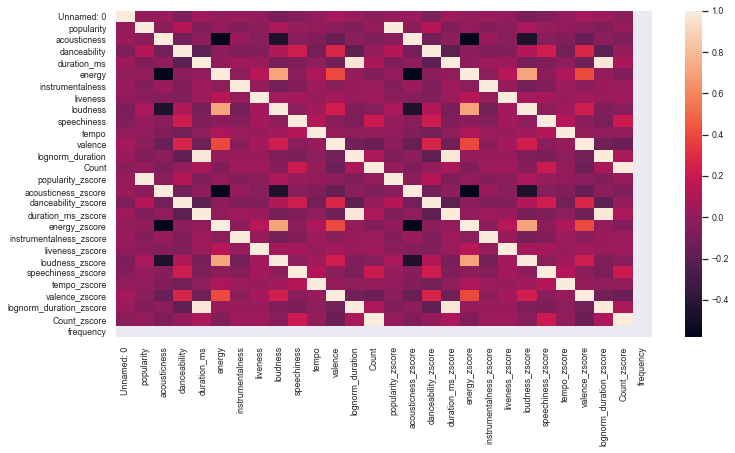

In [55]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(allpop.corr())

print(pop.corr())

From this we get a general idea of what popular music features look like. These trends don't mean much without looking at the trends and corrletions of unpopular music so I will examine them next. 

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.609815     -0.020868     -0.059472   
popularity                -0.609815    1.000000     -0.004037     -0.000015   
acousticness              -0.020868   -0.004037      1.000000     -0.041084   
danceability              -0.059472   -0.000015     -0.041084      1.000000   
duration_ms               -0.014124    0.012232     -0.036868     -0.145550   
energy                     0.070908    0.007078     -0.307364     -0.254462   
instrumentalness           0.035062    0.018541      0.074228     -0.043548   
liveness                   0.008892   -0.029974     -0.037017     -0.145032   
loudness                  -0.000521    0.077159     -0.277737     -0.116546   
speechiness               -0.032168   -0.078432      0.111146      0.063404   
tempo                     -0.001113   -0.008136     -0.090215     -0.054910   
valence                    0.014716    0.009424     

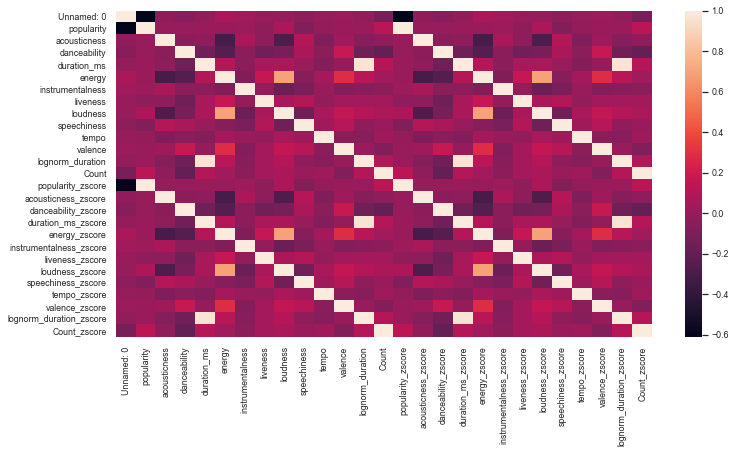

In [52]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

From this one can see two large trends that exists between popular versus nonpopular music. Danceability has a positive corrletion with popularity, but almsot no correltion with populairty for unpopular songs. The second is that popular music has a negative correlation with duration, but almost no correlation with duration for unpopular songs. 

# RAP MUSIC

In [25]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
nopop = dfe[dfe.popular == 'not-popular']




print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.207185     -0.102619     -0.073233   
popularity                -0.207185    1.000000      0.034636      0.141193   
acousticness              -0.102619    0.034636      1.000000     -0.074459   
danceability              -0.073233    0.141193     -0.074459      1.000000   
duration_ms                0.032192   -0.109831     -0.027345     -0.171785   
energy                     0.231783   -0.081578     -0.358079     -0.211555   
instrumentalness           0.028752   -0.052111      0.051108     -0.075751   
liveness                   0.011592   -0.020384     -0.071431     -0.119293   
loudness                   0.156443    0.003477     -0.325003     -0.079367   
speechiness               -0.123437   -0.049445      0.052969      0.107933   
tempo                     -0.034808    0.015436     -0.083540     -0.055602   
valence                    0.138932   -0.013515     

This information gives a close look into corrletions among popular and unpopular rap music. I will investigate energy, danceability, loudness, and speechiness since they are the variables with the highest correlations to popularity for rap. I will look in depth at correlations with these features. Along with these the Count and lognorm_duration features will be investigated as they are features not from the Spotify API and which I believe could have correlation with popularity.

Many plots will be created for rap music to begin to visualize what trends and aspects of music make a rap song popular/

AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.866922,0.164909;0.101026x0.132766)


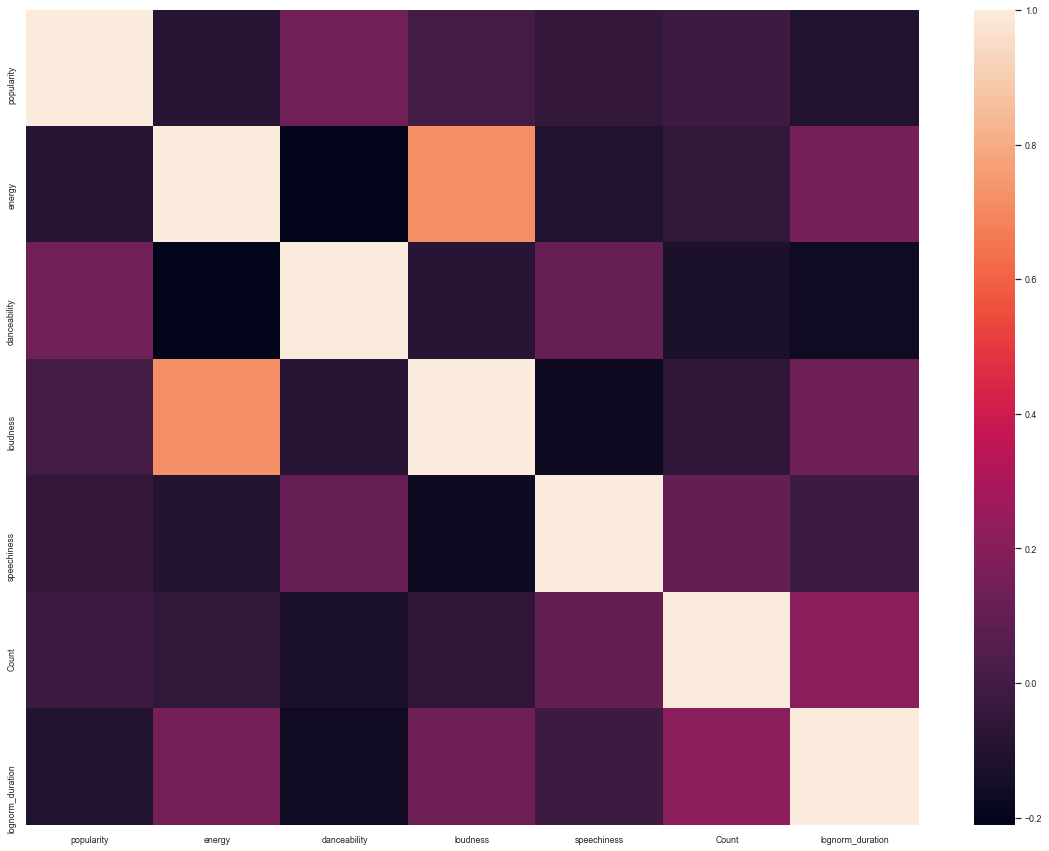

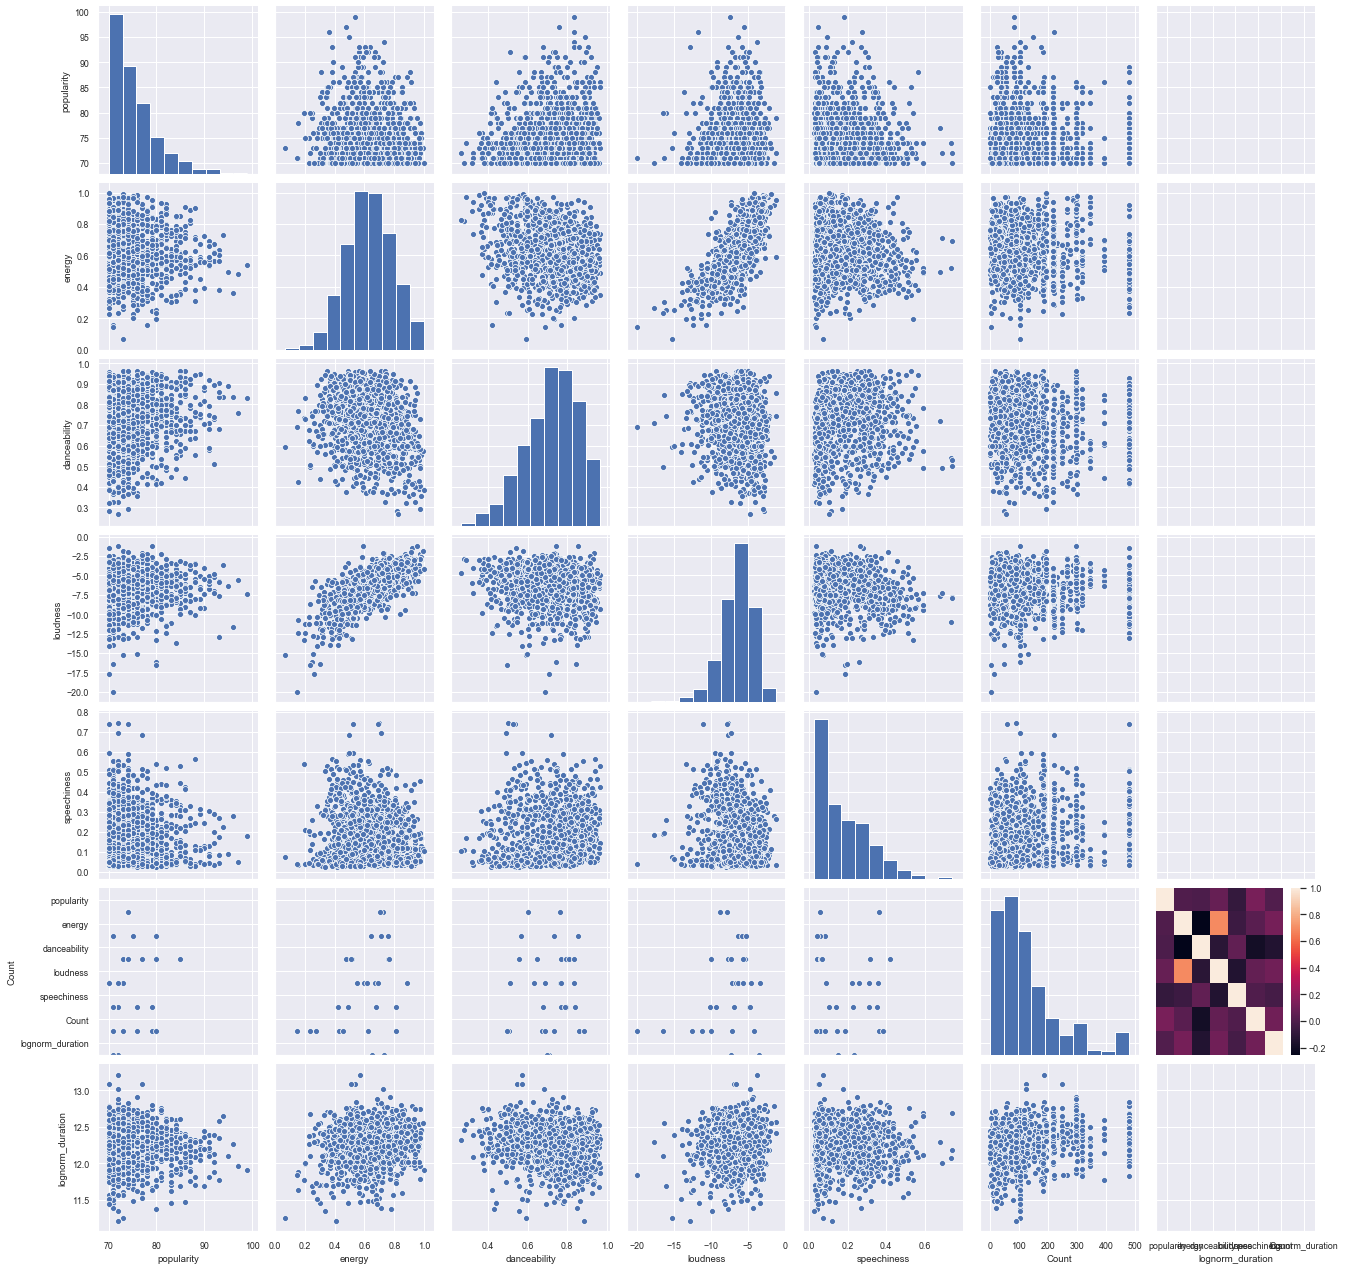

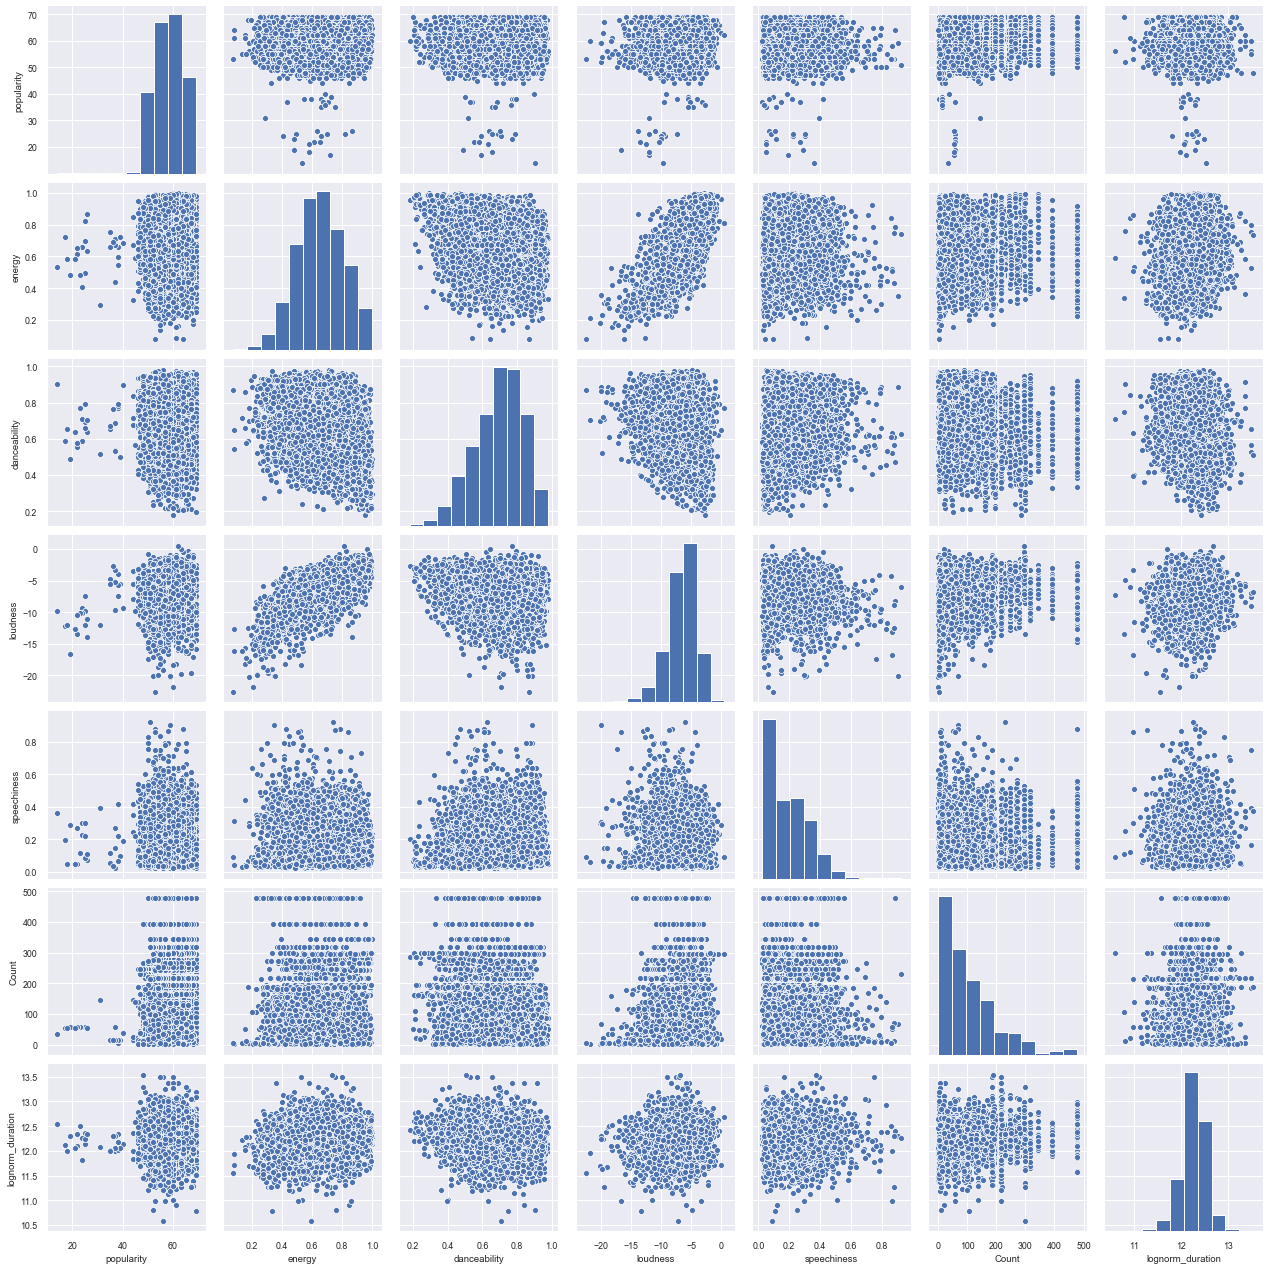

In [56]:
plt.subplots(figsize=(20,15))
pop1 = pop[['popularity','energy', 'danceability','loudness','speechiness','Count','lognorm_duration']]
nonpop1 = nonpop[['popularity','energy', 'danceability','loudness','speechiness','Count','lognorm_duration']]
m = sns.heatmap(pop1.corr())
print(m)
n = sns.pairplot(data=pop1)
print(n)
o = sns.heatmap(nonpop1.corr())
print(o)
p = sns.pairplot(data=nonpop1)
print(p)



<ErrorbarContainer object of 3 artists>

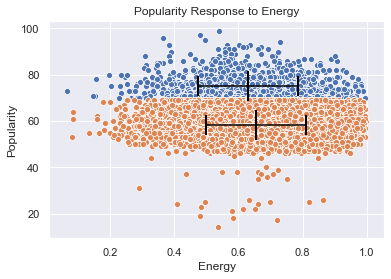

In [19]:
sns.scatterplot(pop.energy, pop.popularity)
sns.scatterplot(nonpop.energy, nonpop.popularity)
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.title("Popularity Response to Energy")

plt.errorbar(np.mean(pop.energy),np.mean(pop.popularity),xerr=np.std(pop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.energy),np.mean(nonpop.popularity),xerr=np.std(nonpop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

It looks like there is a difference in average Energy for popular and unpopular rap music.

<ErrorbarContainer object of 3 artists>

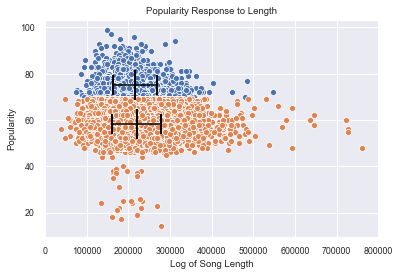

In [57]:
sns.scatterplot(pop.duration_ms, pop.popularity)
sns.scatterplot(nonpop.duration_ms, nonpop.popularity)
plt.xlabel("Log of Song Length")
plt.ylabel("Popularity")
plt.title("Popularity Response to Length")

plt.errorbar(np.mean(pop.duration_ms),np.mean(pop.popularity),xerr=np.std(pop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.duration_ms),np.mean(nonpop.popularity),xerr=np.std(nonpop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

It looks like there is not too much of a difference for the average Log Length feature for popular versus unpooular Rap music, but it does look like there are more outliers with unpopular music.

<ErrorbarContainer object of 3 artists>

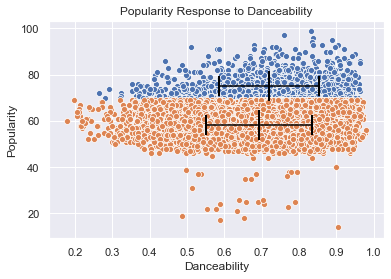

In [67]:
sns.scatterplot(pop.danceability, pop.popularity)
sns.scatterplot(nonpop.danceability, nonpop.popularity)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Popularity Response to Danceability")

plt.errorbar(np.mean(pop.danceability),np.mean(pop.popularity),xerr=np.std(pop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.danceability),np.mean(nonpop.popularity),xerr=np.std(nonpop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

As mentioned before with all music, there is a difference in danceability average for popular versus unpopular music.

<ErrorbarContainer object of 3 artists>

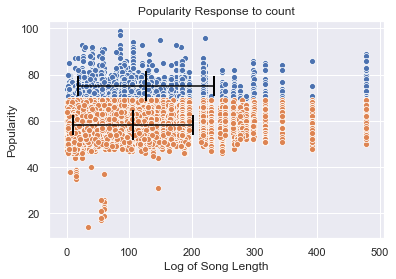

In [76]:
sns.scatterplot(pop.Count, pop.popularity)
sns.scatterplot(nonpop.Count, nonpop.popularity)
plt.xlabel("Count")
plt.ylabel("Popularity")
plt.title("Popularity Response to Count")

plt.errorbar(np.mean(pop.Count),np.mean(pop.popularity),xerr=np.std(pop.Count),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.Count),np.mean(nonpop.popularity),xerr=np.std(nonpop.Count),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

It appears that there is a differnce for popular and unpopular songs for Count, popular songs tend to be made by artists that have more songs out.

Next, I will investigate and compare these features another way to view how the selected features differ between popular and unpopular rap songs. 

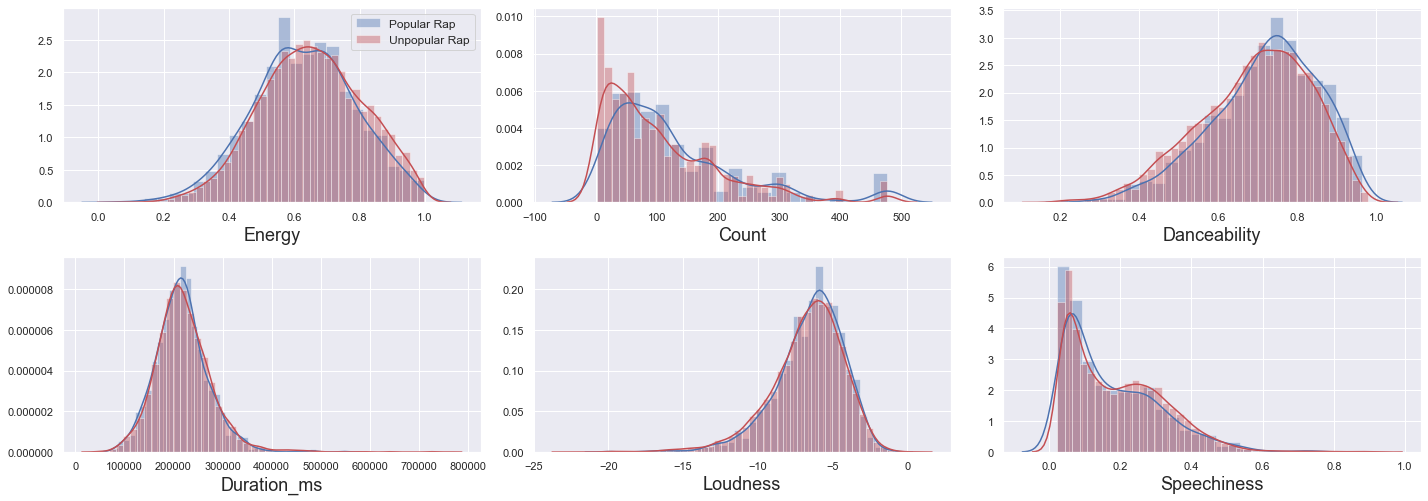

In [69]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(pop.energy, label='Popular Rap')
sns.distplot(nonpop.energy, color='r', label='Unpopular Rap')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.loudness)
sns.distplot(nonpop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(nonpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


This is just a more in depth look at how these features differ between popular and unpopular songs, but also one can see how the data are distributed better, e.g if they are a perfect bell curve, bimodal, etc. and how outliers look. 

Most of them follow the bell curve, however count is distributed discretly the more an artists produces. Between 0 and 100 it is normal, 100 to 200 is elongated, but from 200 on, espicially after 300 it looks like nothing exists until blips at 400 and 500 for both unpopular and popular music. The only difference being popular music has larger magnitudes out there. 

Going forward for the rest of the genres this is the best way to visualize the differences in the data for key features when making comparisons of popular to unpopular music, and music fro ma gtiven genre to the rest of the music. As one can see how the data is distrubted as a curve rather than data points, making trends easier to pick up on.



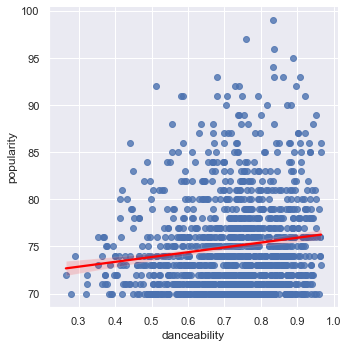

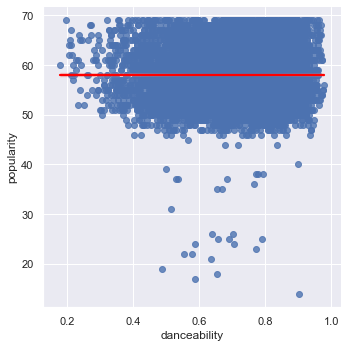

In [70]:
n = sns.lmplot(x='danceability',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='danceability',y='popularity',data=nonpop,line_kws={'color': 'red'})
print(p)


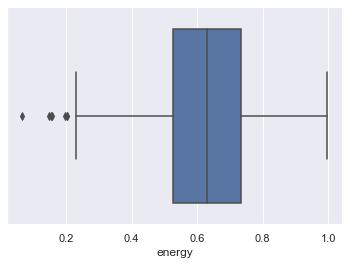

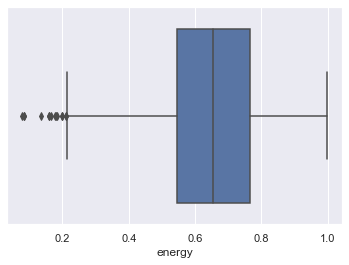

In [71]:
sns.boxplot(x='energy', data=pop, whis=1.5)
plt.show()

sns.boxplot(x='energy', data=nonpop, whis=1.5)
plt.show()

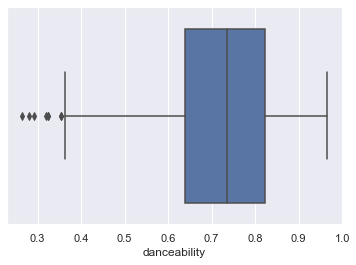

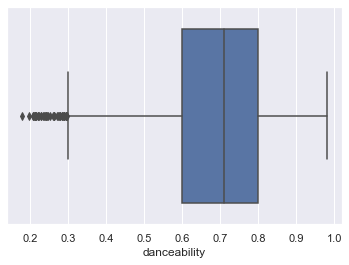

In [72]:
sns.boxplot(x='danceability', data=pop, whis=1.5)
plt.show()

sns.boxplot(x='danceability', data=nonpop, whis=1.5)
plt.show()

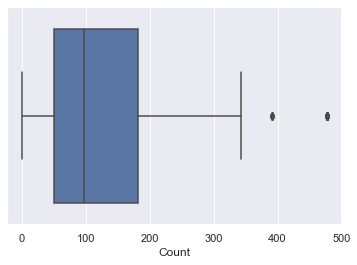

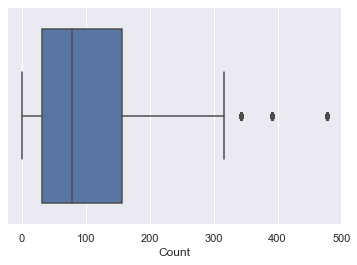

In [73]:
sns.boxplot(x='Count', data=pop, whis=1.5)
plt.show()

sns.boxplot(x='Count', data=nonpop, whis=1.5)
plt.show()

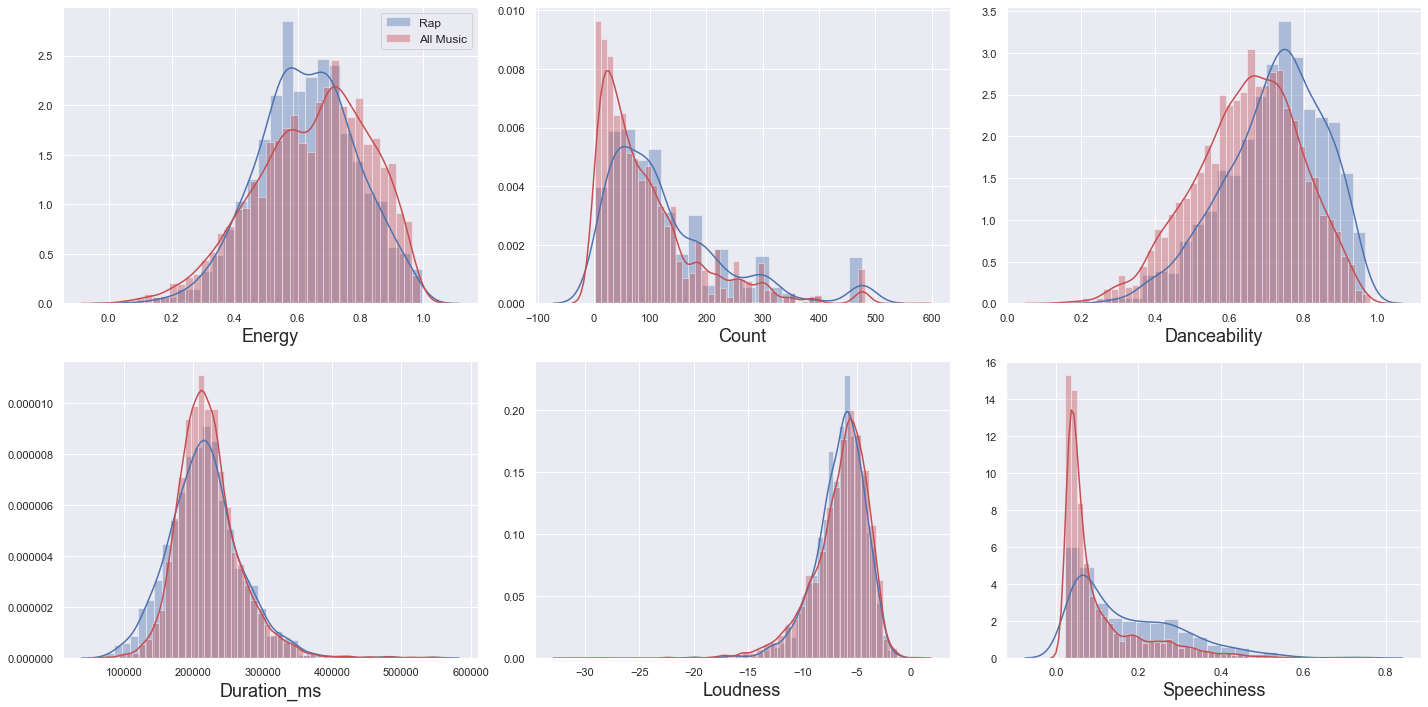

In [74]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(pop.energy, label='Rap')
sns.distplot(allpop.energy, color='r', label='All Music')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.loudness)
sns.distplot(allpop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(236)
sns.distplot(pop.speechiness)
sns.distplot(allpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)



plt.tight_layout()
plt.show()


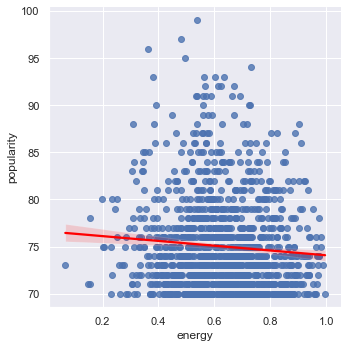

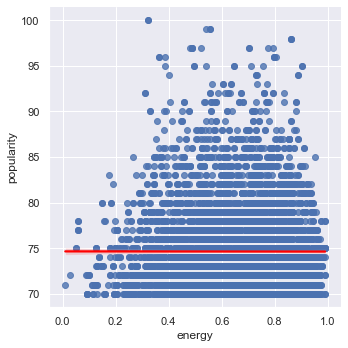

In [75]:
n = sns.lmplot(x='energy',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='energy',y='popularity',data=allpop,line_kws={'color': 'red'})
print(p)

# COUNTRY MUSIC

In [77]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Country']
df = dfg[dfg['genre'] == 'Country']

cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']


print(df.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.681033      0.077713     -0.018223   
popularity                -0.681033    1.000000     -0.034193      0.022790   
acousticness               0.077713   -0.034193      1.000000     -0.043650   
danceability              -0.018223    0.022790     -0.043650      1.000000   
duration_ms                0.039048    0.003960     -0.036201     -0.200838   
energy                    -0.095938    0.052582     -0.698235      0.047057   
instrumentalness           0.044947    0.004714      0.045472     -0.037066   
liveness                   0.060338   -0.071631     -0.051183     -0.077035   
loudness                  -0.124325    0.042379     -0.534730     -0.056025   
speechiness                0.043267   -0.033917     -0.082292      0.158743   
tempo                      0.005623   -0.021031     -0.131720     -0.235978   
valence                   -0.039718    0.052208     

This is the feature correlation makeup of country music. Let us further examine how these features differ between popular and unpopular country.

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.527848      0.062775     -0.069673   
popularity                -0.527848    1.000000      0.163524      0.079182   
acousticness               0.062775    0.163524      1.000000      0.138972   
danceability              -0.069673    0.079182      0.138972      1.000000   
duration_ms                0.138869   -0.040086      0.100529     -0.331882   
energy                    -0.036060   -0.227212     -0.625512     -0.203012   
instrumentalness           0.146436   -0.002674      0.148746     -0.185904   
liveness                  -0.078674    0.049755     -0.136800     -0.078288   
loudness                  -0.188995   -0.188936     -0.457204     -0.176931   
speechiness               -0.001886   -0.075055     -0.113341     -0.072080   
tempo                      0.113276   -0.125076      0.011314     -0.298336   
valence                   -0.145728    0.083629     

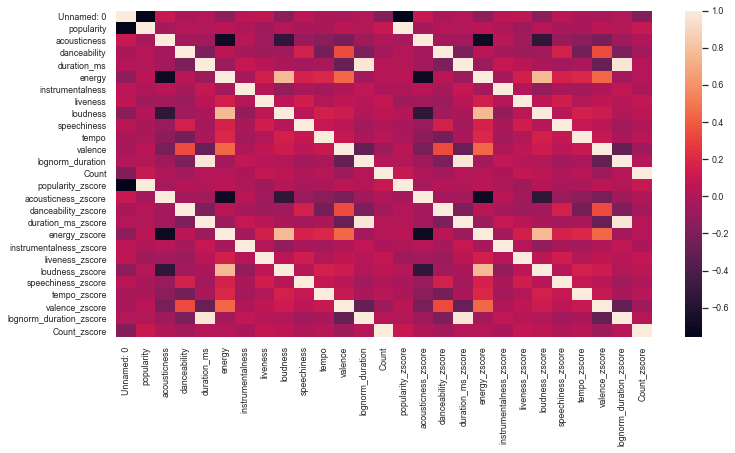

In [78]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.757067      0.106317     -0.017604   
popularity                -0.757067    1.000000     -0.032703      0.021949   
acousticness               0.106317   -0.032703      1.000000     -0.045960   
danceability              -0.017604    0.021949     -0.045960      1.000000   
duration_ms                0.030506    0.012109     -0.038418     -0.198980   
energy                    -0.120642    0.046151     -0.699159      0.049889   
instrumentalness           0.056976    0.007231      0.044355     -0.035568   
liveness                   0.072678   -0.066403     -0.050731     -0.076911   
loudness                  -0.139729    0.028647     -0.535732     -0.055091   
speechiness                0.048355   -0.028374     -0.082521      0.160606   
tempo                     -0.021293   -0.014693     -0.134271     -0.235032   
valence                   -0.028581    0.047121     

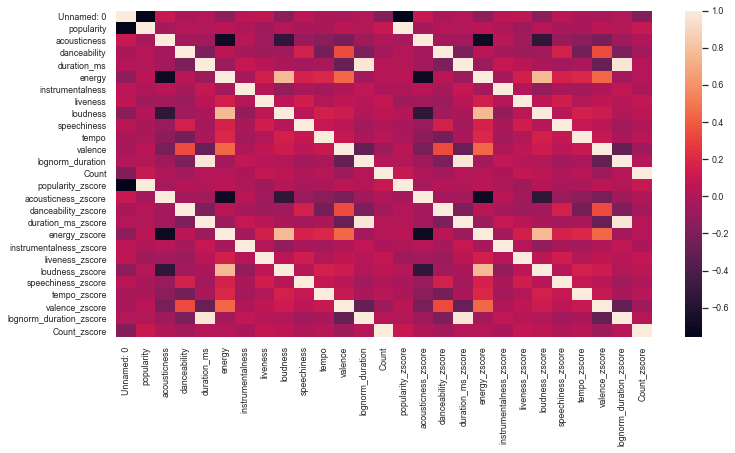

In [79]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

From this we can glean that energy has a large negative corrletion in popular music, but a slight positive correlation with unpopular music. Acousticness has a large positive correlation with popularity for popular music, but a slight negative one for unpopular music. Loudness has a large negative correlation with popular music that does not exist with unpopular music. 

Going forward let's look at count, valence, energy, acousticness, loudness, and liveness.

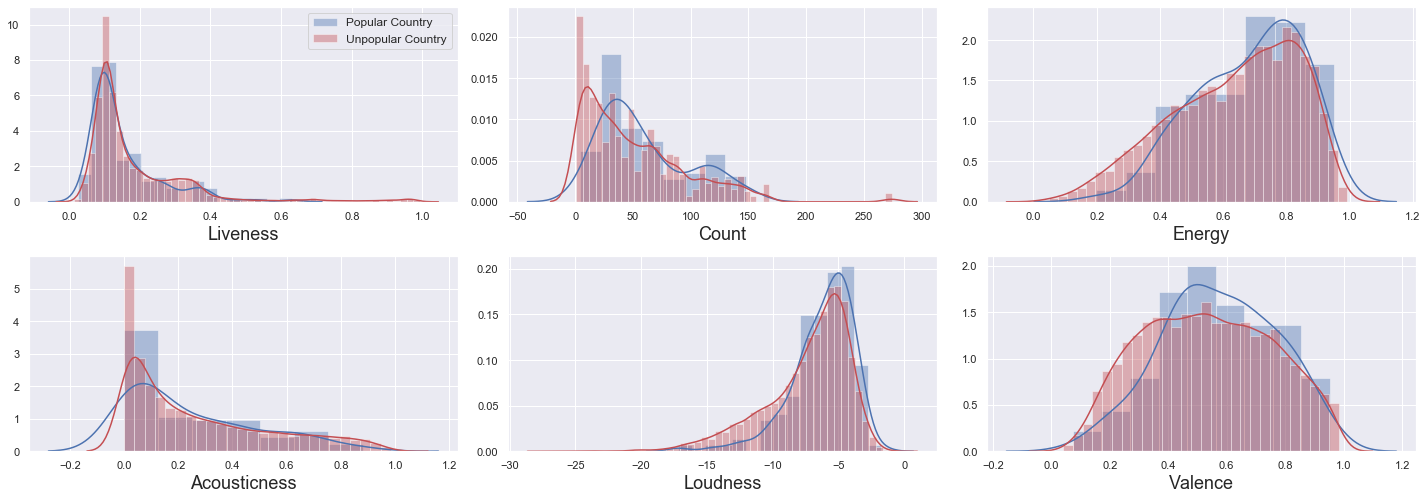

In [82]:

plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Country')
sns.distplot(nonpop.liveness, color='r', label='Unpopular Country')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.energy)
sns.distplot(nonpop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(pop.acousticness)
sns.distplot(nonpop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)

plt.subplot(335)
sns.distplot(pop.loudness)
sns.distplot(nonpop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.valence)
sns.distplot(nonpop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

plt.tight_layout()
plt.show()


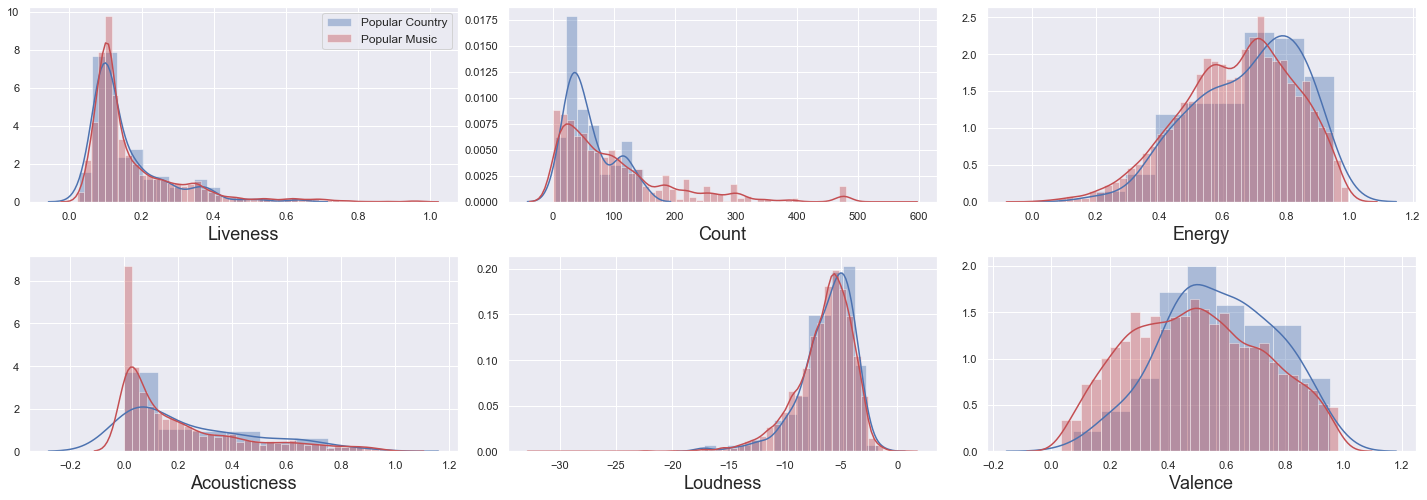

In [84]:

plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Country')
sns.distplot(allpop.liveness, color='r', label='Popular Music')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.energy)
sns.distplot(allpop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(pop.acousticness)
sns.distplot(allpop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)

plt.subplot(335)
sns.distplot(pop.loudness)
sns.distplot(allpop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.valence)
sns.distplot(allpop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

plt.tight_layout()
plt.show()


# ALTERNATIVE

In [90]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Alternative']
df = dfg[dfg['genre'] == 'Alternative']

cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']

#I will not look at the correltions here because we only want to look at the differences between popular 
#Alternative and unpopular alternative, not the general trends of just Alternative
#print(df.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.351447     -0.042262      0.091714   
popularity                -0.351447    1.000000      0.013696     -0.018215   
acousticness              -0.042262    0.013696      1.000000      0.186105   
danceability               0.091714   -0.018215      0.186105      1.000000   
duration_ms                0.130859    0.041429     -0.151662     -0.268529   
energy                    -0.006629    0.032572     -0.708332     -0.212945   
instrumentalness          -0.022488   -0.086188      0.000398      0.026828   
liveness                   0.201665   -0.041125      0.003530     -0.050880   
loudness                  -0.027252    0.092708     -0.585003     -0.052358   
speechiness               -0.151423   -0.025798      0.209531      0.107220   
tempo                     -0.019314    0.032107     -0.055666     -0.123152   
valence                    0.235700   -0.091151     

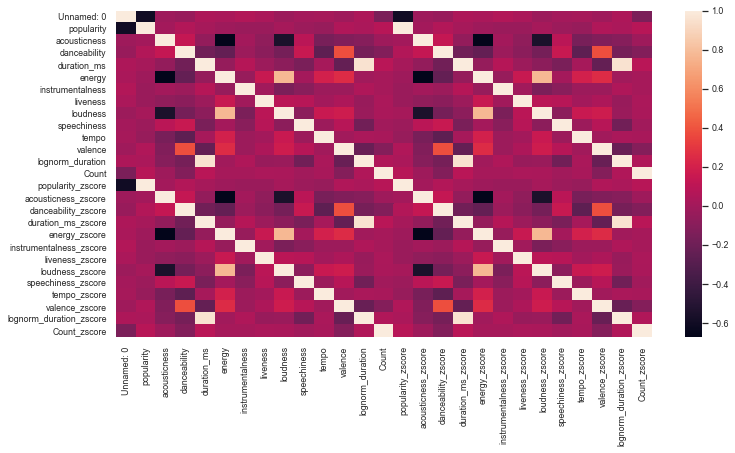

In [86]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.592712     -0.013577     -0.034110   
popularity                -0.592712    1.000000      0.007831      0.065565   
acousticness              -0.013577    0.007831      1.000000      0.138453   
danceability              -0.034110    0.065565      0.138453      1.000000   
duration_ms                0.041932    0.020139     -0.056718     -0.185459   
energy                     0.031595   -0.014335     -0.670774     -0.234043   
instrumentalness           0.065312   -0.030022      0.004868     -0.018299   
liveness                   0.034720   -0.026340     -0.068232     -0.088353   
loudness                  -0.019189    0.016221     -0.552265     -0.170658   
speechiness                0.011528   -0.019036      0.093644      0.150369   
tempo                      0.017963   -0.039536     -0.160231     -0.265851   
valence                   -0.006503    0.057191     

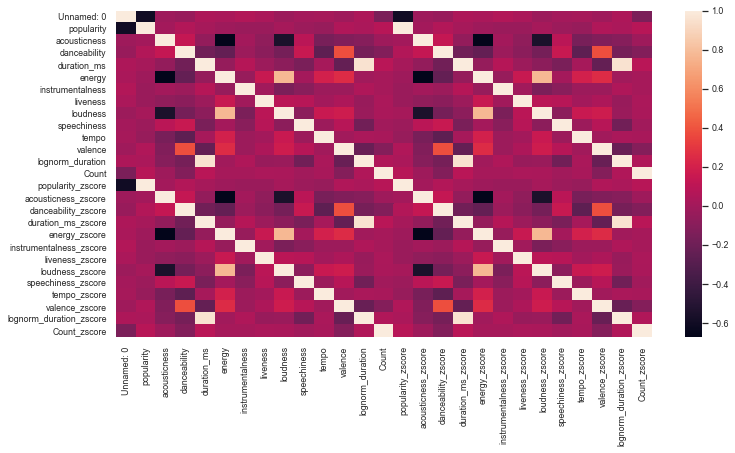

In [87]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

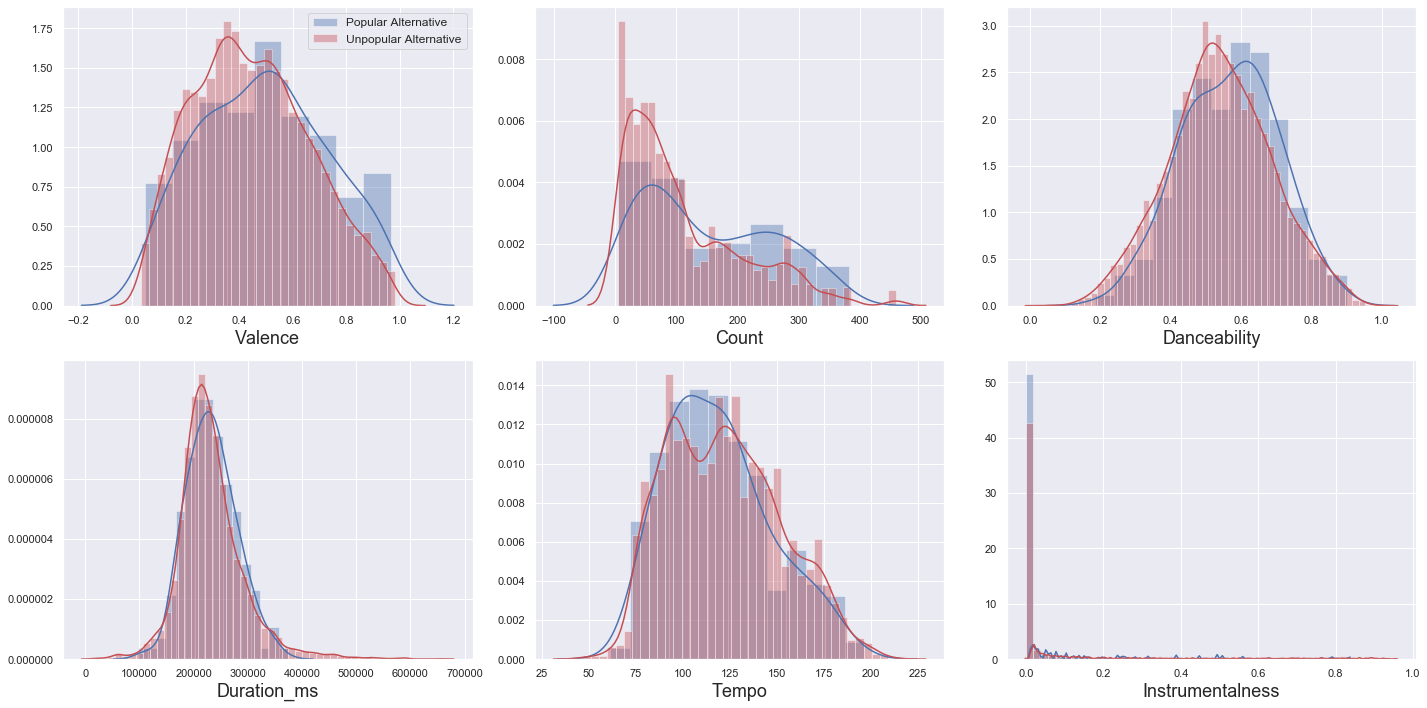

In [88]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(231)
sns.distplot(pop.valence, label='Popular Alternative')
sns.distplot(nonpop.valence, color='r', label='Unpopular Alternative')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(nonpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


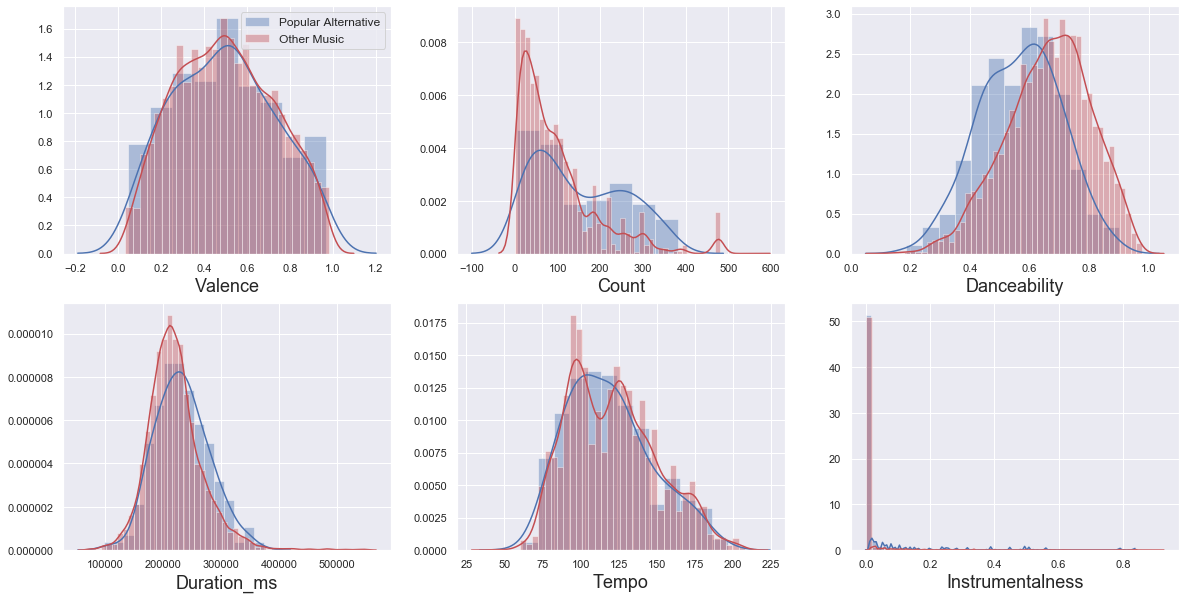

In [89]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(pop.valence, label='Popular Alternative')
sns.distplot(allpop.valence, color='r', label='Other Music')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(allpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)


plt.show()


# POP

In [91]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Pop']
df = dfg[dfg['genre'] == 'Pop']

In [93]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']



                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.432789      0.014809     -0.066250   
popularity                -0.432789    1.000000     -0.003704      0.111180   
acousticness               0.014809   -0.003704      1.000000     -0.166052   
danceability              -0.066250    0.111180     -0.166052      1.000000   
duration_ms                0.033041   -0.085121      0.023635     -0.157349   
energy                     0.132855   -0.021216     -0.572901      0.012003   
instrumentalness           0.048809   -0.024353      0.027467     -0.059119   
liveness                   0.017916   -0.026958     -0.072766     -0.048760   
loudness                   0.032775    0.037878     -0.456864      0.093700   
speechiness               -0.120382   -0.011804     -0.082394      0.199037   
tempo                     -0.020358   -0.005969     -0.099738     -0.111019   
valence                    0.155366   -0.029414     

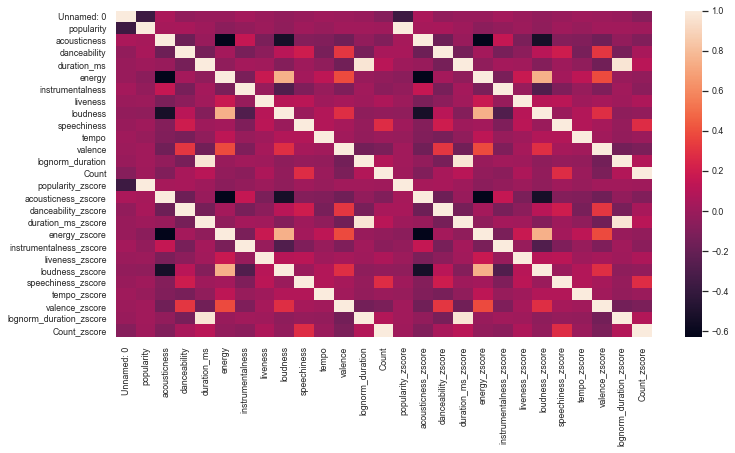

In [94]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.365579      0.063834     -0.032653   
popularity                -0.365579    1.000000      0.039733      0.046513   
acousticness               0.063834    0.039733      1.000000     -0.171998   
danceability              -0.032653    0.046513     -0.171998      1.000000   
duration_ms               -0.005216    0.009201     -0.007512     -0.135763   
energy                    -0.011028   -0.061155     -0.628161      0.038902   
instrumentalness           0.037162   -0.029291      0.154197     -0.131474   
liveness                  -0.000443    0.007403     -0.116937     -0.050621   
loudness                  -0.033565   -0.036945     -0.528900      0.115804   
speechiness               -0.005531    0.017180     -0.083336      0.194935   
tempo                      0.019670   -0.016725     -0.095845     -0.129487   
valence                    0.002383    0.025488     

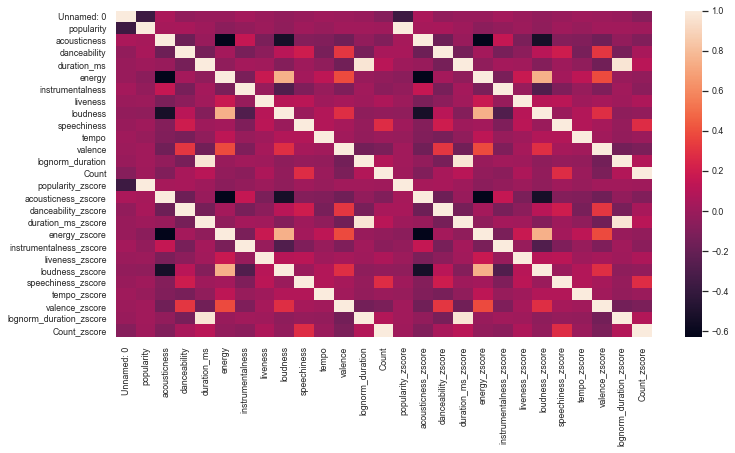

In [95]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

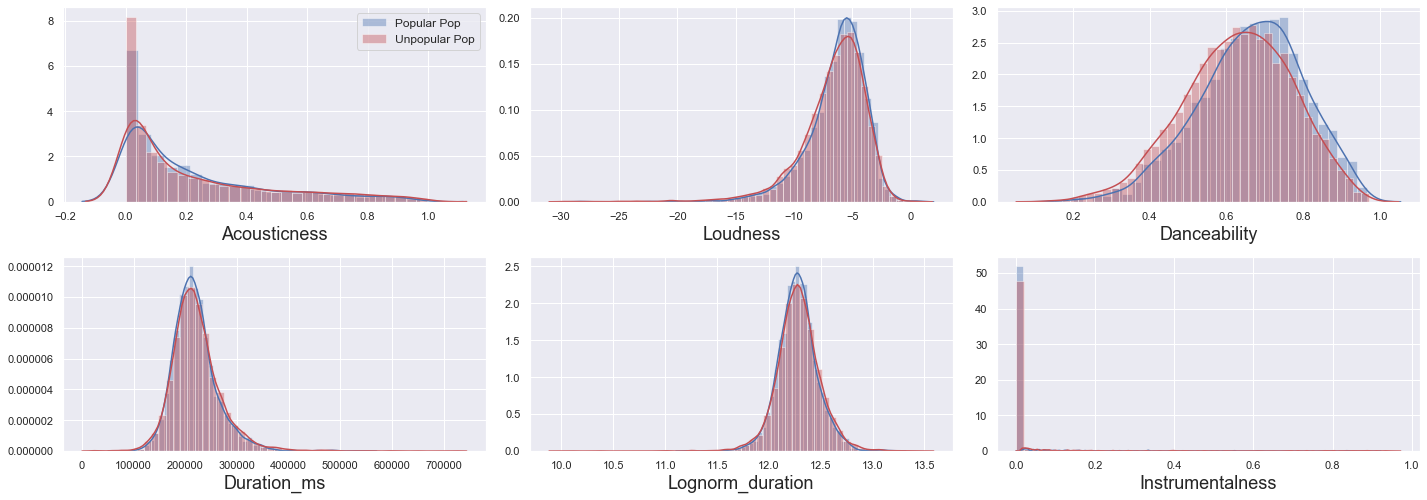

In [98]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(pop.acousticness, label='Popular Pop')
sns.distplot(nonpop.acousticness, color='r', label='Unpopular Pop')
plt.xlabel('Acousticness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.loudness)
sns.distplot(nonpop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.lognorm_duration)
sns.distplot(nonpop.lognorm_duration, color='r')
plt.xlabel('Lognorm_duration', fontsize=18)

plt.subplot(336)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


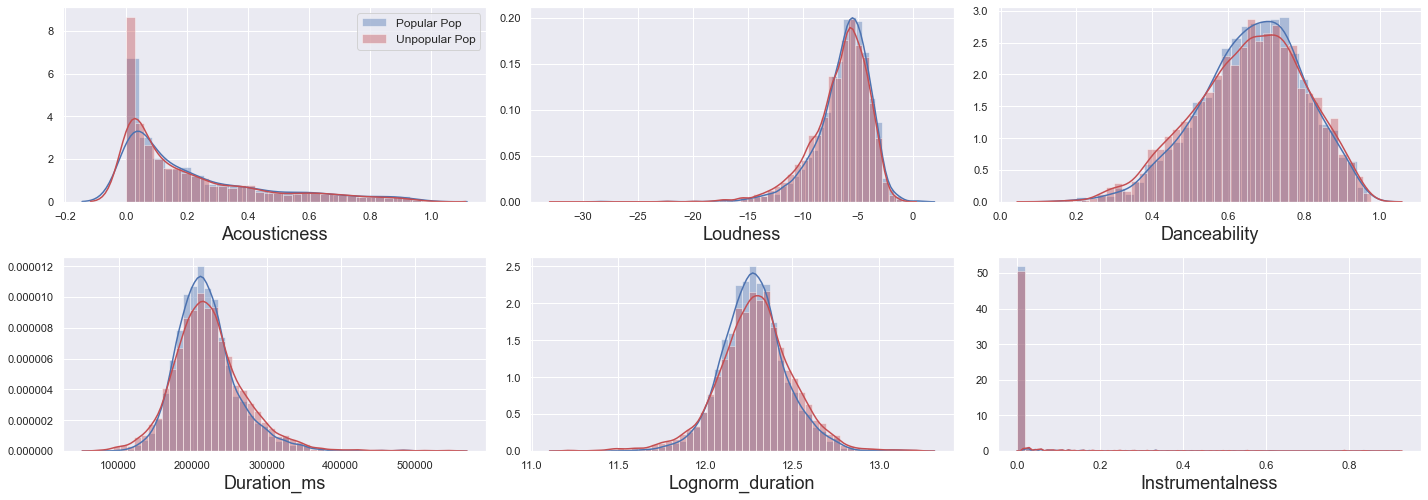

In [99]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(pop.acousticness, label='Popular Pop')
sns.distplot(allpop.acousticness, color='r', label='Unpopular Pop')
plt.xlabel('Acousticness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.loudness)
sns.distplot(allpop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.lognorm_duration)
sns.distplot(allpop.lognorm_duration, color='r')
plt.xlabel('Lognorm_duration', fontsize=18)

plt.subplot(336)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Valence')

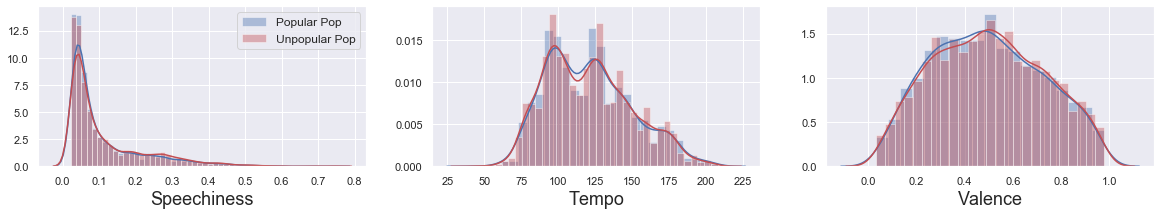

In [100]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(pop.speechiness, label='Popular Pop')
sns.distplot(allpop.speechiness, color='r', label='Unpopular Pop')
plt.xlabel('Speechiness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.tempo)
sns.distplot(allpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(333)
sns.distplot(pop.valence)
sns.distplot(allpop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

# INDIE

In [101]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Indie']
df = dfg[dfg['genre'] == 'Indie']

In [102]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.173068     -0.038563     -0.037003   
popularity                -0.173068    1.000000     -0.158444      0.020218   
acousticness              -0.038563   -0.158444      1.000000     -0.173579   
danceability              -0.037003    0.020218     -0.173579      1.000000   
duration_ms                0.164224    0.097663     -0.030860     -0.262087   
energy                    -0.101697    0.128049     -0.746727      0.098406   
instrumentalness          -0.069233   -0.027592      0.086907     -0.043959   
liveness                  -0.088488    0.076641     -0.034854     -0.048397   
loudness                  -0.126492    0.171480     -0.592340      0.188518   
speechiness               -0.123660    0.021276     -0.048795      0.216277   
tempo                      0.066912    0.122812     -0.126870     -0.122726   
valence                    0.040288   -0.036272     

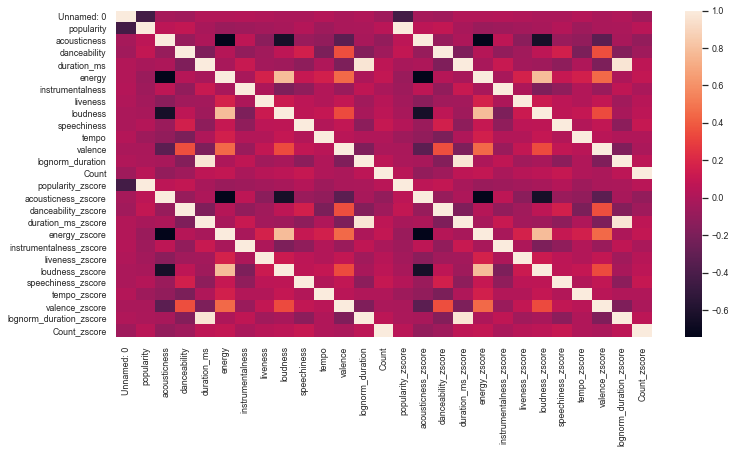

In [103]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.431064     -0.025986     -0.045070   
popularity                -0.431064    1.000000      0.066485      0.088678   
acousticness              -0.025986    0.066485      1.000000     -0.087284   
danceability              -0.045070    0.088678     -0.087284      1.000000   
duration_ms                0.022392   -0.015129      0.004071     -0.181012   
energy                     0.023684   -0.075238     -0.743044      0.034232   
instrumentalness           0.027289   -0.060956      0.070953     -0.107026   
liveness                   0.015884   -0.038685     -0.131636     -0.048542   
loudness                  -0.001892   -0.015372     -0.637836      0.073382   
speechiness               -0.004878    0.032395     -0.069660      0.158277   
tempo                      0.029754   -0.059564     -0.109266     -0.197315   
valence                   -0.008104   -0.012981     

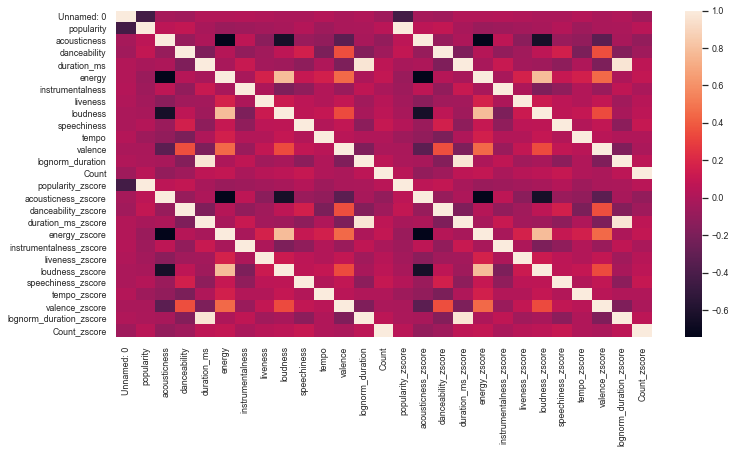

In [104]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

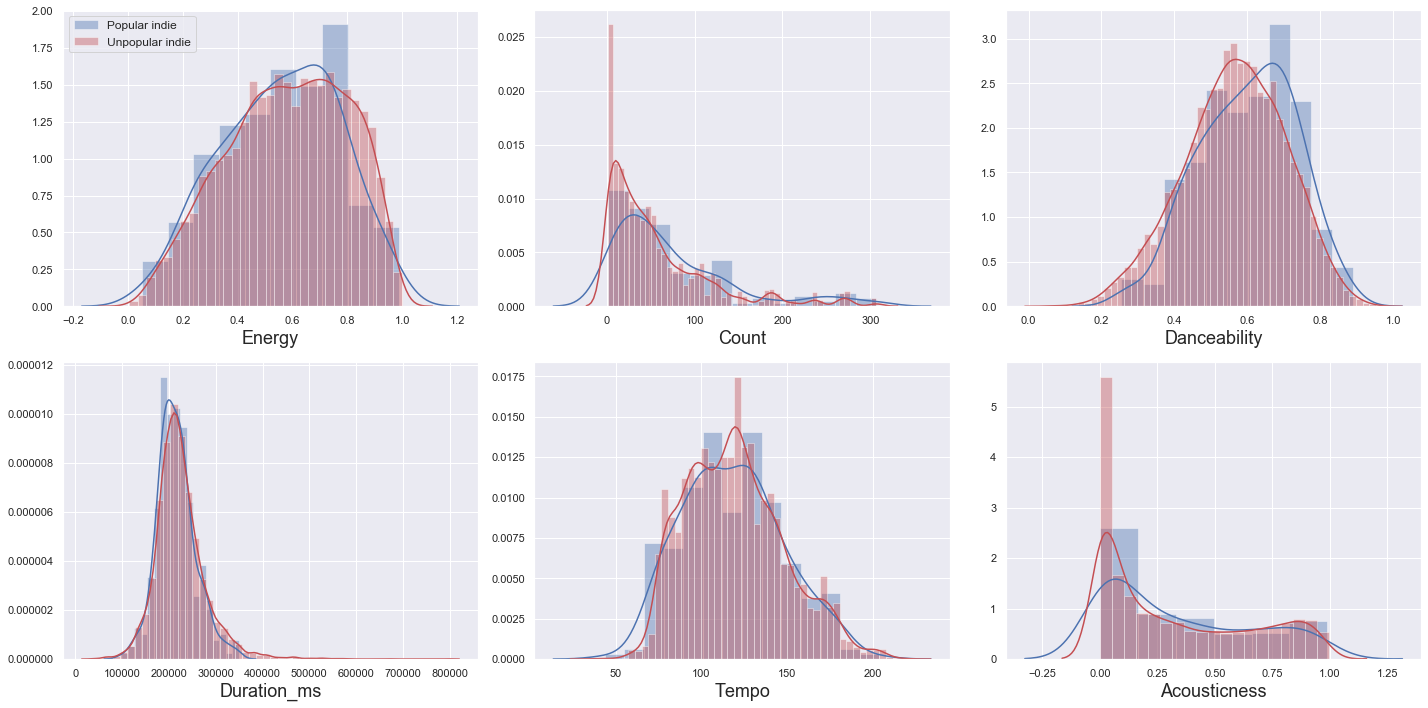

In [105]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(pop.energy, label='Popular indie')
sns.distplot(nonpop.energy, color='r', label='Unpopular indie')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(nonpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.acousticness)
sns.distplot(nonpop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)

plt.tight_layout()
plt.show()


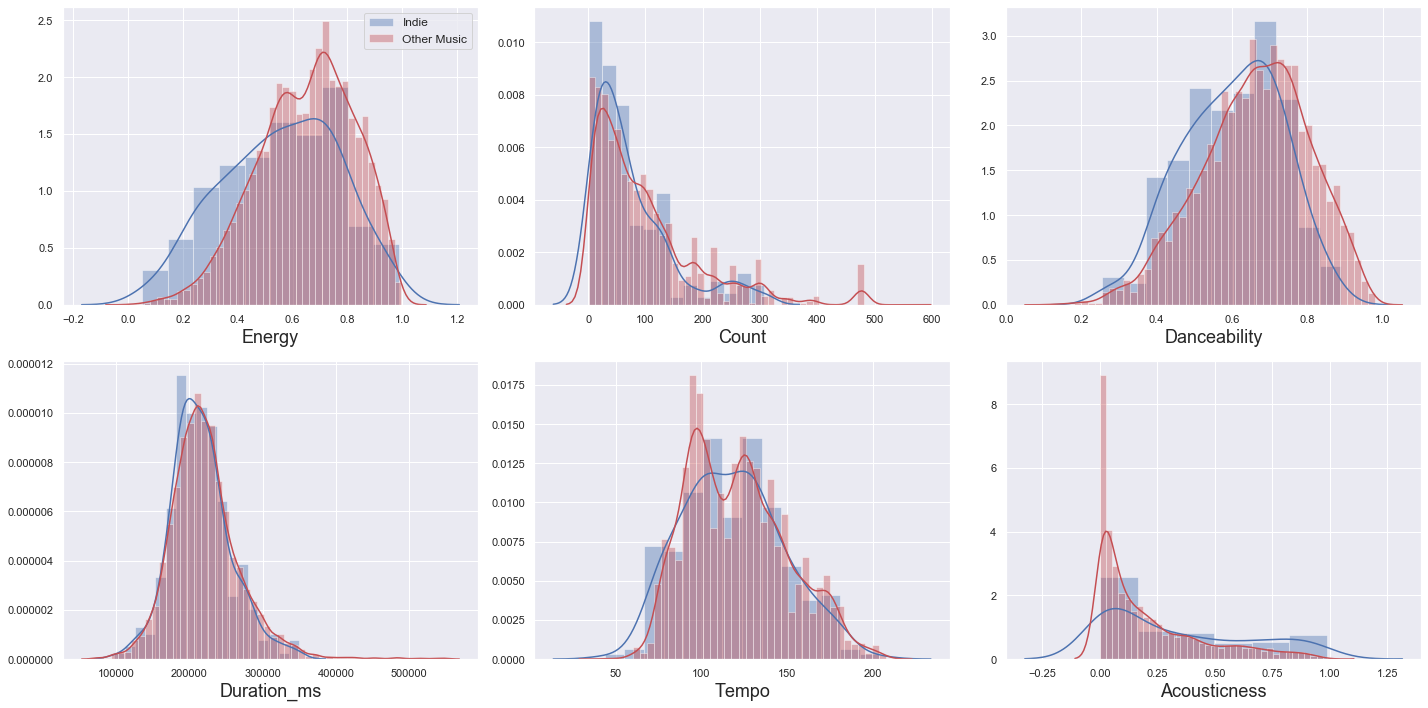

In [106]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(231)
sns.distplot(pop.energy, label='Indie')
sns.distplot(allpop.energy, color='r', label='Other Music')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(allpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.acousticness)
sns.distplot(allpop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)



plt.tight_layout()
plt.show()


# Jazz

In [107]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Jazz']
df = dfg[dfg['genre'] == 'Jazz']

In [108]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']



                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.513599      0.004295      0.109560   
popularity                -0.513599    1.000000     -0.024876     -0.066364   
acousticness               0.004295   -0.024876      1.000000     -0.600326   
danceability               0.109560   -0.066364     -0.600326      1.000000   
duration_ms                0.472884   -0.084744     -0.146504      0.295867   
energy                    -0.012193    0.038897     -0.835410      0.494052   
instrumentalness           0.165481   -0.354476      0.376235     -0.075950   
liveness                  -0.290614    0.021120      0.002646     -0.555099   
loudness                   0.012557   -0.197112     -0.740766      0.371846   
speechiness               -0.132683   -0.349342     -0.296110      0.417518   
tempo                      0.034981    0.049754      0.129688     -0.312815   
valence                   -0.291335    0.355214     

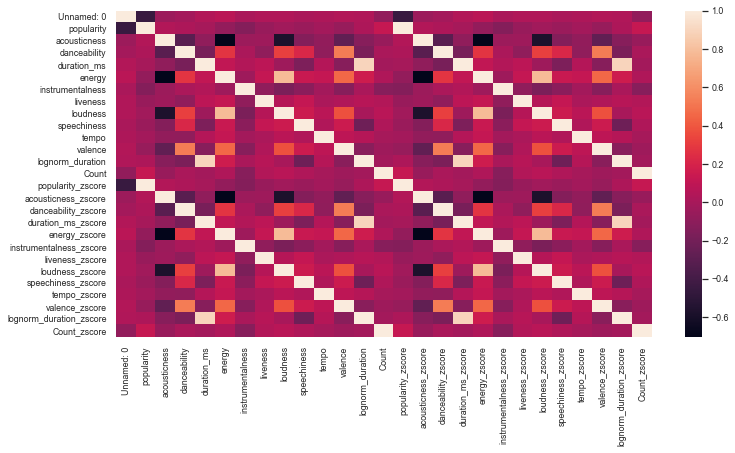

In [109]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.445670     -0.038029     -0.006208   
popularity                -0.445670    1.000000      0.046721      0.028501   
acousticness              -0.038029    0.046721      1.000000     -0.309232   
danceability              -0.006208    0.028501     -0.309232      1.000000   
duration_ms                0.042923   -0.002421     -0.084345     -0.178067   
energy                     0.077735   -0.073363     -0.702063      0.276355   
instrumentalness           0.014464   -0.132917     -0.042587      0.020748   
liveness                   0.041797   -0.050666     -0.035833     -0.086950   
loudness                   0.041262   -0.022876     -0.570638      0.316779   
speechiness                0.014943   -0.045403     -0.131221      0.221512   
tempo                      0.024276   -0.013150     -0.080665     -0.087067   
valence                    0.043712   -0.061991     

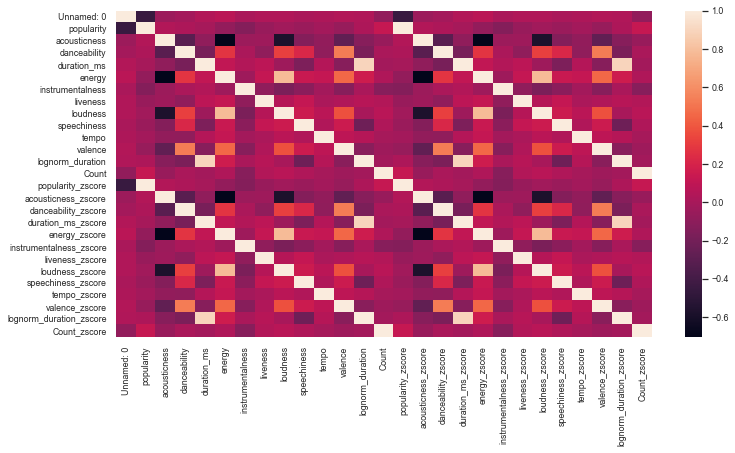

In [110]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

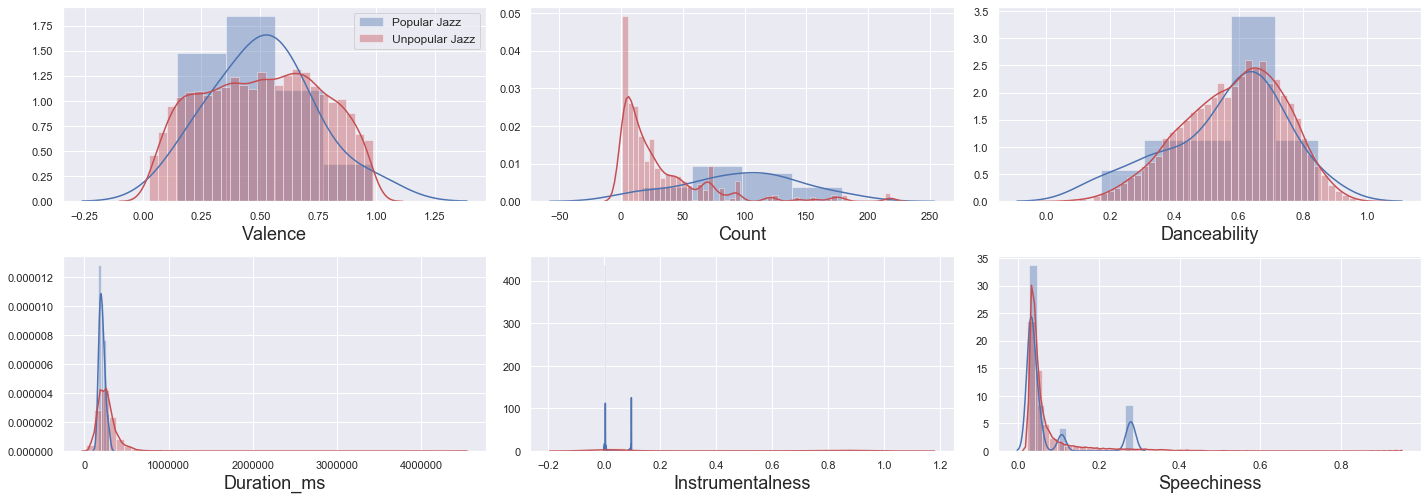

In [111]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.valence, label='Popular Jazz')
sns.distplot(nonpop.valence, color='r', label='Unpopular Jazz')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(nonpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


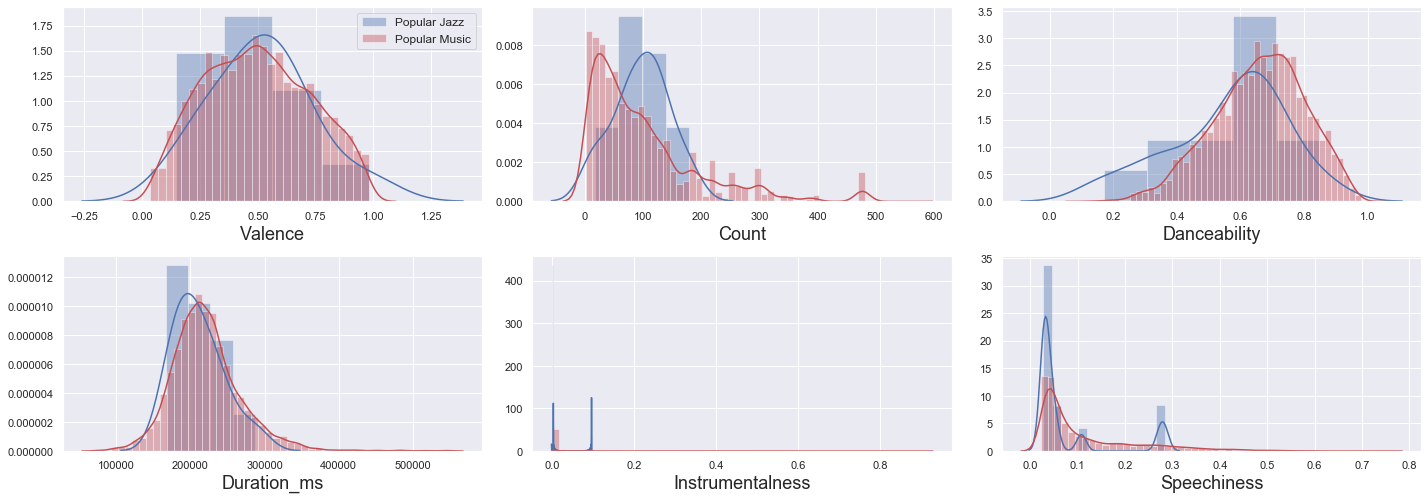

In [112]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.valence, label='Popular Jazz')
sns.distplot(allpop.valence, color='r', label='Popular Music')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(allpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


# DANCE

In [113]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Dance']
df = dfg[dfg['genre'] == 'Dance']

In [114]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000    0.566578      0.103413      0.029400   
popularity                 0.566578    1.000000      0.030458      0.042971   
acousticness               0.103413    0.030458      1.000000     -0.043024   
danceability               0.029400    0.042971     -0.043024      1.000000   
duration_ms               -0.062888   -0.134196     -0.005712     -0.125793   
energy                    -0.145958   -0.025424     -0.459435      0.037374   
instrumentalness          -0.018531   -0.042060     -0.002853     -0.009253   
liveness                  -0.014715   -0.053493     -0.073588     -0.028815   
loudness                  -0.036489    0.064768     -0.339186      0.103966   
speechiness                0.017852   -0.000543      0.033205     -0.020355   
tempo                     -0.030138   -0.061793     -0.040220     -0.188513   
valence                   -0.063591   -0.043164     

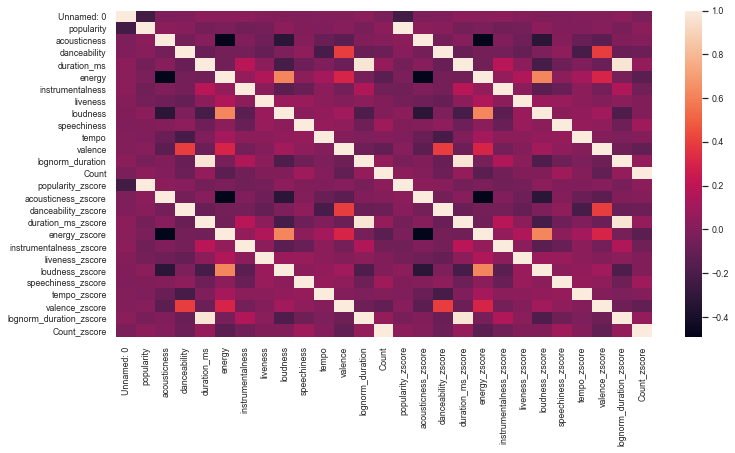

In [115]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.223049     -0.014617     -0.008150   
popularity                -0.223049    1.000000      0.037873      0.021170   
acousticness              -0.014617    0.037873      1.000000     -0.044345   
danceability              -0.008150    0.021170     -0.044345      1.000000   
duration_ms                0.030466   -0.043486      0.011640     -0.086367   
energy                     0.026038   -0.029796     -0.490505     -0.046430   
instrumentalness           0.035180   -0.062585     -0.012975     -0.046731   
liveness                   0.004418   -0.045965     -0.070657     -0.094595   
loudness                  -0.003986    0.030306     -0.321023     -0.016262   
speechiness               -0.008278   -0.004298      0.008502      0.043855   
tempo                      0.003700   -0.009182     -0.085934     -0.210405   
valence                    0.001106    0.012037     

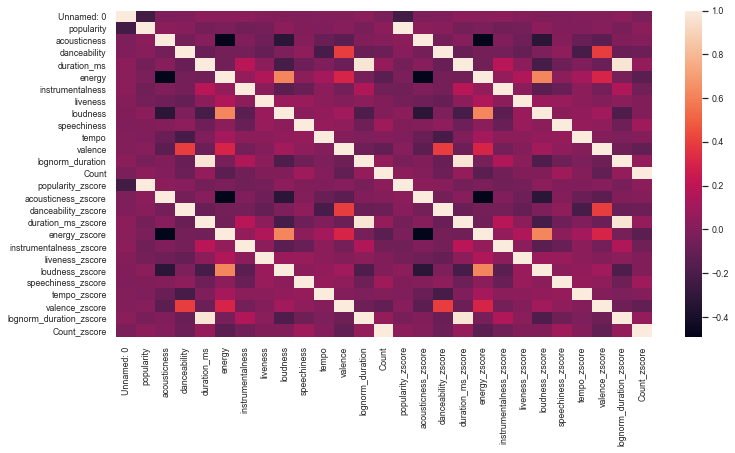

In [116]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

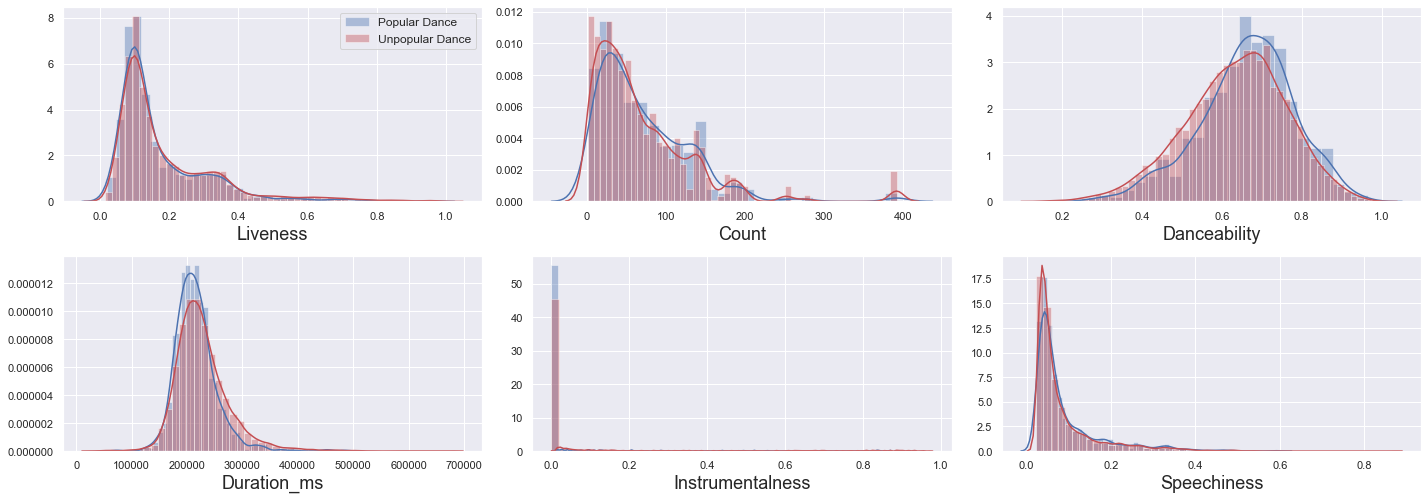

In [117]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Dance')
sns.distplot(nonpop.liveness, color='r', label='Unpopular Dance')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(nonpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


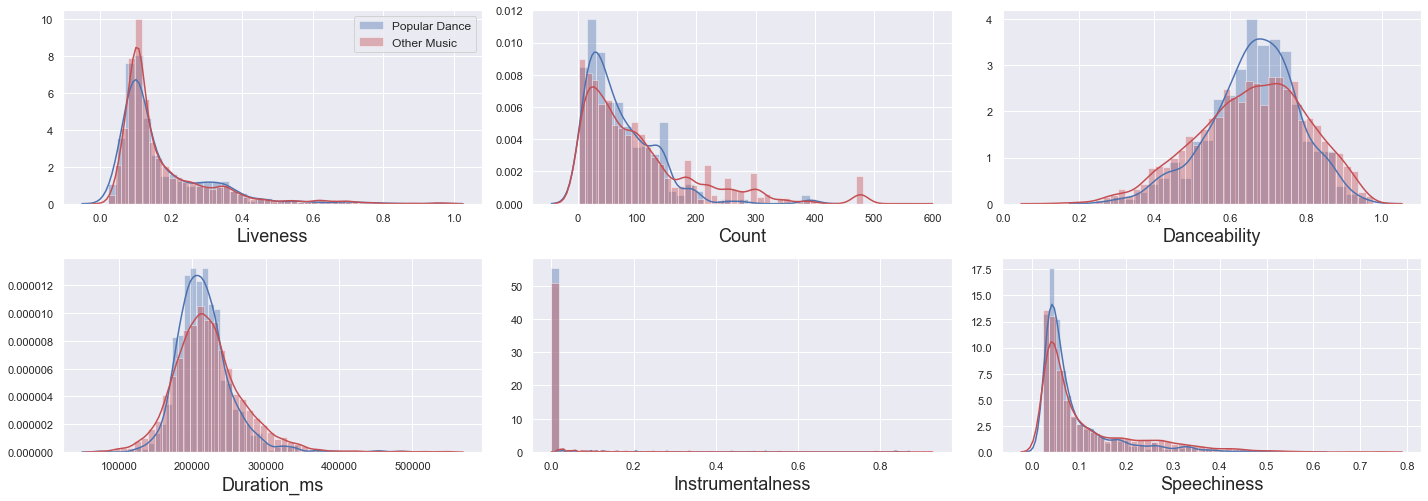

In [118]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Dance')
sns.distplot(allpop.liveness, color='r', label='Other Music')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(allpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


# BLUES

In [128]:
dfe = pd.read_csv('Data.csv')
df = dfe[dfe['genre'] == 'Blues']

In [129]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']



                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000    0.209527     -0.026839     -0.099673   
popularity                 0.209527    1.000000      0.013696     -0.018215   
acousticness              -0.026839    0.013696      1.000000      0.186105   
danceability              -0.099673   -0.018215      0.186105      1.000000   
duration_ms               -0.094602    0.041429     -0.151662     -0.268529   
energy                     0.051246    0.032572     -0.708332     -0.212945   
instrumentalness           0.034430   -0.086188      0.000398      0.026828   
liveness                  -0.149116   -0.041125      0.003530     -0.050880   
loudness                   0.054379    0.092708     -0.585003     -0.052358   
speechiness                0.119404   -0.025798      0.209531      0.107220   
tempo                      0.014828    0.032107     -0.055666     -0.123152   
valence                   -0.152045   -0.091151     

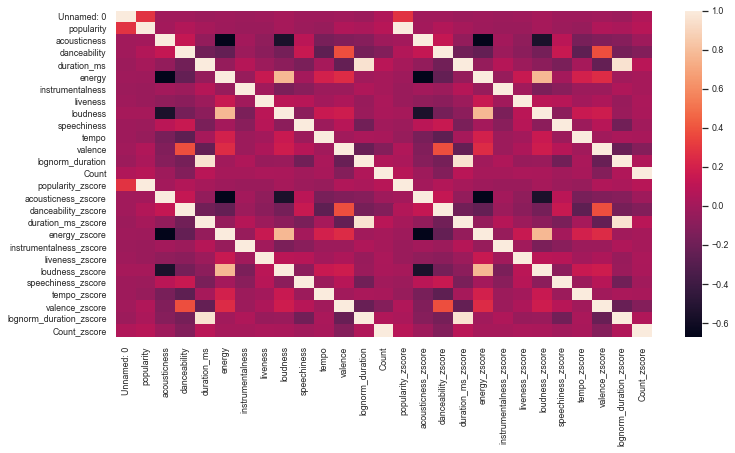

In [121]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000    0.283943      0.000194     -0.002589   
popularity                 0.283943    1.000000      0.007831      0.065565   
acousticness               0.000194    0.007831      1.000000      0.138453   
danceability              -0.002589    0.065565      0.138453      1.000000   
duration_ms               -0.020990    0.020139     -0.056718     -0.185459   
energy                    -0.007344   -0.014335     -0.670774     -0.234043   
instrumentalness          -0.023268   -0.030022      0.004868     -0.018299   
liveness                  -0.011577   -0.026340     -0.068232     -0.088353   
loudness                   0.016780    0.016221     -0.552265     -0.170658   
speechiness               -0.016384   -0.019036      0.093644      0.150369   
tempo                     -0.016742   -0.039536     -0.160231     -0.265851   
valence                   -0.004028    0.057191     

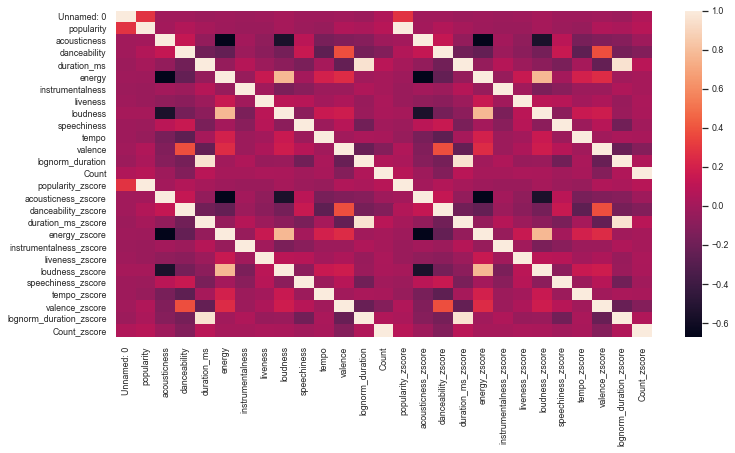

In [122]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(nonpop.corr())

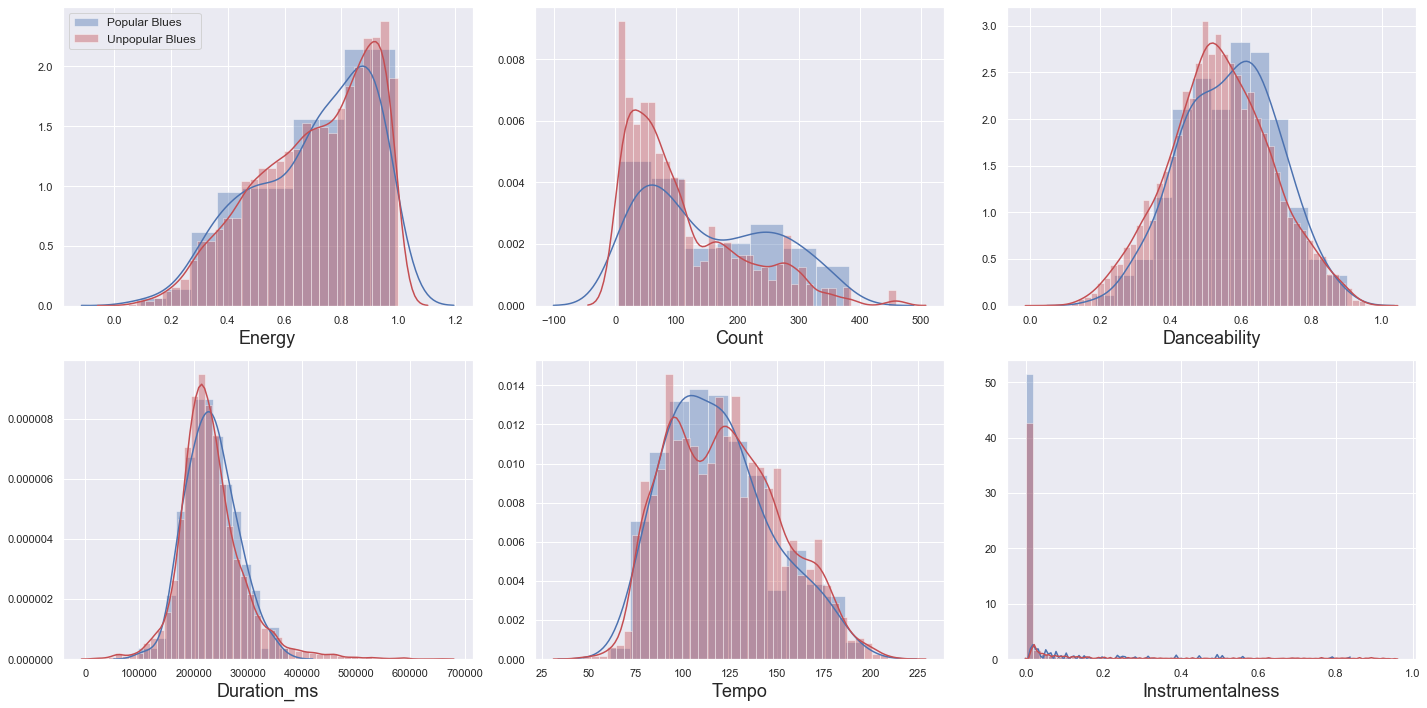

In [123]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(pop.energy, label='Popular Blues')
sns.distplot(nonpop.energy, color='r', label='Unpopular Blues')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(nonpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


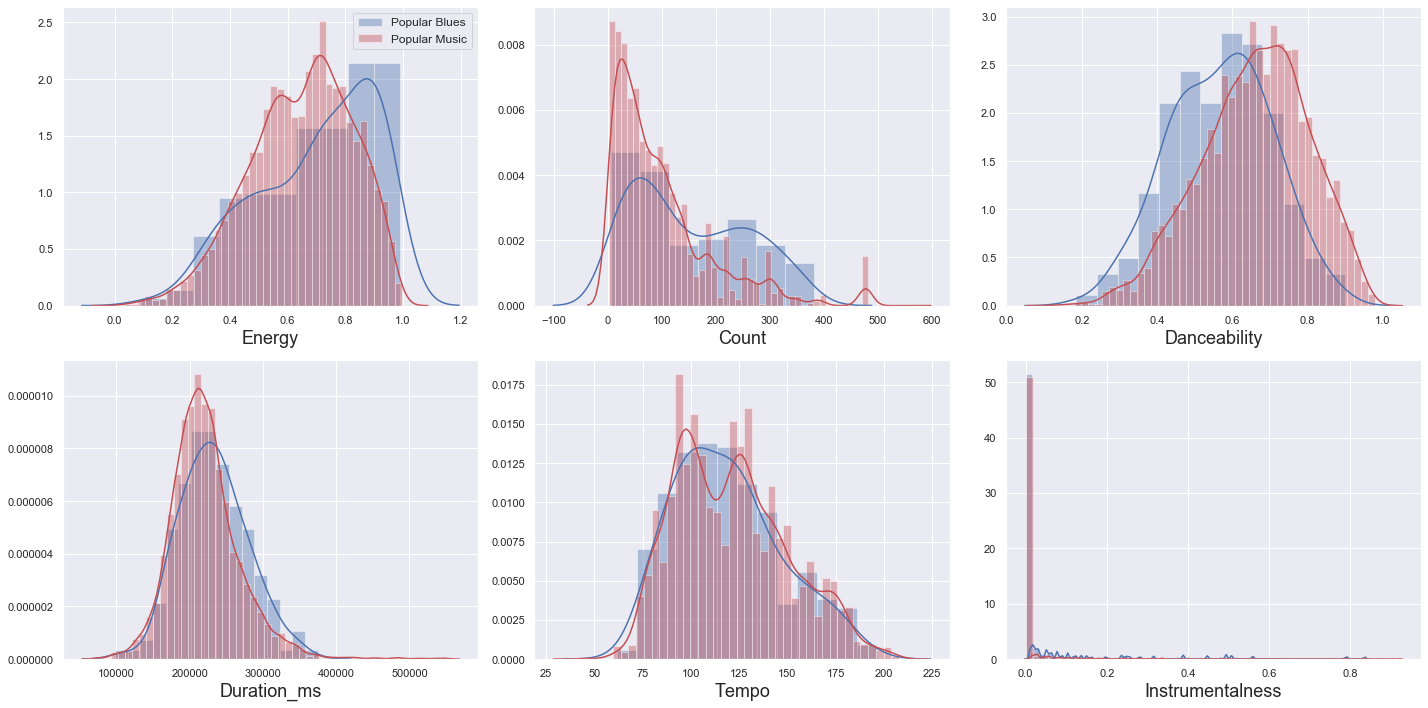

In [130]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(pop.energy, label='Popular Blues')
sns.distplot(allpop.energy, color='r', label='Popular Music')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(allpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


In [ ]:
Popular Blues has more energy on average than popular music, and is less danceable on average. 

# CLASSICAL

In [124]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Classical']
df = dfg[dfg['genre'] == 'Classical']

In [125]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                      NaN         NaN           NaN           NaN   
popularity                      NaN         NaN           NaN           NaN   
acousticness                    NaN         NaN           NaN           NaN   
danceability                    NaN         NaN           NaN           NaN   
duration_ms                     NaN         NaN           NaN           NaN   
energy                          NaN         NaN           NaN           NaN   
instrumentalness                NaN         NaN           NaN           NaN   
liveness                        NaN         NaN           NaN           NaN   
loudness                        NaN         NaN           NaN           NaN   
speechiness                     NaN         NaN           NaN           NaN   
tempo                           NaN         NaN           NaN           NaN   
valence                         NaN         NaN     

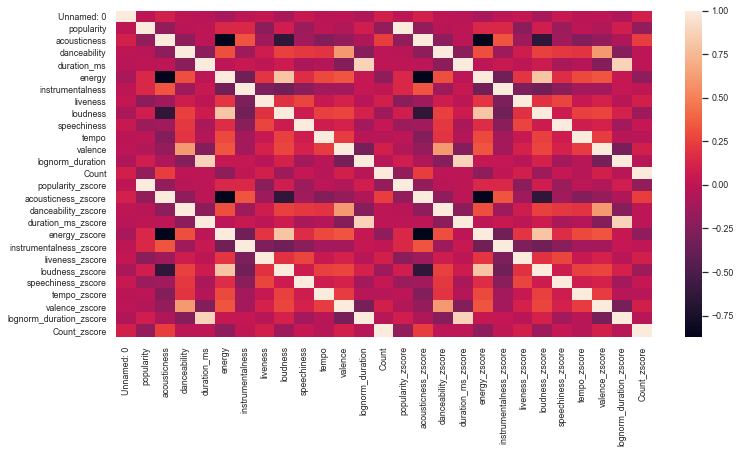

In [126]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())

print(pop.corr())

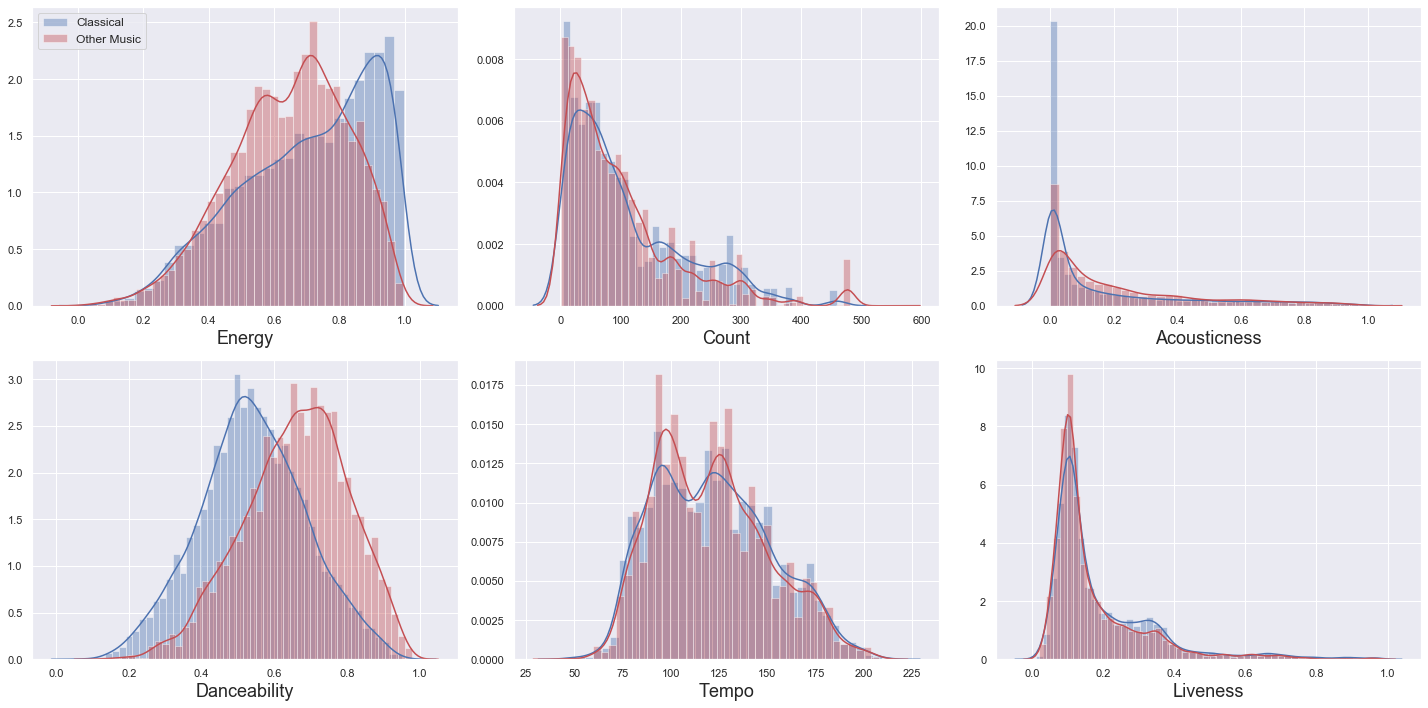

In [131]:
plt.figure(figsize=(20,10))

sns.set()

plt.subplot(231)
sns.distplot(nonpop.energy, label='Classical')
sns.distplot(allpop.energy, color='r', label='Other Music')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(nonpop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(nonpop.acousticness)
sns.distplot(allpop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)

plt.subplot(234)
sns.distplot(nonpop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(235)
sns.distplot(nonpop.tempo)
sns.distplot(allpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(nonpop.liveness)
sns.distplot(allpop.liveness, color='r')
plt.xlabel('Liveness', fontsize=18)

plt.tight_layout()
plt.show()
